In [2]:
#Importing all necessary Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pnx
import scipy.stats as stats
from sklearn.impute import SimpleImputer

#Clustering Required Libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

#PCA Required Libraries
from factor_analyzer import FactorAnalyzer
from sci_analysis import analyze
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from sklearn.decomposition import PCA
#from yellowbrick.features import PCA
from matplotlib.patches import Rectangle
from factor_analyzer.factor_analyzer import calculate_kmo

# Declaring this to show graphs after inline command instead of plt.show() after every instance of plotting
%matplotlib inline

#Set the max number of rows in output cell to 30
pd.options.display.max_rows = 100


#Ignore unnecessary warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
Fulldata_df = pd.read_csv("2022 LoL Esports Data.csv")
Fulldata_df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0


In [4]:
Fulldata_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147984 entries, 0 to 147983
Data columns (total 123 columns):
 #    Column                    Non-Null Count   Dtype  
---   ------                    --------------   -----  
 0    gameid                    147984 non-null  object 
 1    datacompleteness          147984 non-null  object 
 2    url                       21480 non-null   object 
 3    league                    147984 non-null  object 
 4    year                      147984 non-null  int64  
 5    split                     99228 non-null   object 
 6    playoffs                  147984 non-null  int64  
 7    date                      147984 non-null  object 
 8    game                      147984 non-null  int64  
 9    patch                     147876 non-null  float64
 10   participantid             147984 non-null  int64  
 11   side                      147984 non-null  object 
 12   position                  147984 non-null  object 
 13   playername                1

In [5]:
Fulldata_df.isnull().sum()

gameid                   0
datacompleteness         0
url                 126504
league                   0
year                     0
                     ...  
assistsat15          20904
deathsat15           20904
opp_killsat15        20904
opp_assistsat15      20904
opp_deathsat15       20904
Length: 123, dtype: int64

In [6]:
print(Fulldata_df.columns.values)

['gameid' 'datacompleteness' 'url' 'league' 'year' 'split' 'playoffs'
 'date' 'game' 'patch' 'participantid' 'side' 'position' 'playername'
 'playerid' 'teamname' 'teamid' 'champion' 'ban1' 'ban2' 'ban3' 'ban4'
 'ban5' 'gamelength' 'result' 'kills' 'deaths' 'assists' 'teamkills'
 'teamdeaths' 'doublekills' 'triplekills' 'quadrakills' 'pentakills'
 'firstblood' 'firstbloodkill' 'firstbloodassist' 'firstbloodvictim'
 'team kpm' 'ckpm' 'firstdragon' 'dragons' 'opp_dragons' 'elementaldrakes'
 'opp_elementaldrakes' 'infernals' 'mountains' 'clouds' 'oceans'
 'chemtechs' 'hextechs' 'dragons (type unknown)' 'elders' 'opp_elders'
 'firstherald' 'heralds' 'opp_heralds' 'firstbaron' 'barons' 'opp_barons'
 'firsttower' 'towers' 'opp_towers' 'firstmidtower' 'firsttothreetowers'
 'turretplates' 'opp_turretplates' 'inhibitors' 'opp_inhibitors'
 'damagetochampions' 'dpm' 'damageshare' 'damagetakenperminute'
 'damagemitigatedperminute' 'wardsplaced' 'wpm' 'wardskilled' 'wcpm'
 'controlwardsbought' 'vis

In [7]:
Required_Data_df = Fulldata_df.drop(['gameid','url','participantid','playerid', 'teamid','ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'doublekills', 'triplekills', 'quadrakills', 'firstdragon', 'dragons', 'opp_dragons',
                                     'elementaldrakes', 'opp_elementaldrakes', 'infernals', 'mountains', 'clouds', 'oceans', 'chemtechs', 'hextechs', 'dragons (type unknown)', 'elders', 'opp_elders', 'firstherald',],axis=1)
Required_Data_df.head(30)

,datacompleteness,league,year,split,playoffs,date,game,patch,side,position,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Blue,top,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Blue,jng,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Blue,mid,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Blue,bot,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Blue,sup,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
5,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Red,top,...,135.0,-391.0,-345.0,-14.0,0.0,1.0,0.0,0.0,1.0,0.0
6,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Red,jng,...,89.0,-541.0,275.0,11.0,0.0,5.0,1.0,2.0,3.0,2.0
7,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Red,mid,...,120.0,475.0,-153.0,-1.0,3.0,3.0,2.0,0.0,3.0,0.0
8,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Red,bot,...,115.0,793.0,1343.0,34.0,3.0,3.0,0.0,2.0,1.0,2.0
9,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Red,sup,...,28.0,-443.0,497.0,-7.0,0.0,6.0,2.0,1.0,2.0,2.0


In [8]:
lec2022_data_df = Required_Data_df[Required_Data_df["league"]=="LEC"]
lec2022_data_df.head(30)

,datacompleteness,league,year,split,playoffs,date,game,patch,side,position,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
2520,complete,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,Blue,top,...,125.0,-262.0,688.0,-7.0,1.0,1.0,1.0,0.0,1.0,2.0
2521,complete,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,Blue,jng,...,119.0,1298.0,1063.0,-7.0,3.0,3.0,0.0,1.0,0.0,1.0
2522,complete,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,Blue,mid,...,125.0,1743.0,966.0,1.0,2.0,3.0,0.0,0.0,0.0,3.0
2523,complete,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,Blue,bot,...,149.0,-109.0,121.0,-12.0,0.0,0.0,0.0,0.0,0.0,0.0
2524,complete,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,Blue,sup,...,18.0,468.0,152.0,9.0,0.0,3.0,0.0,0.0,1.0,0.0
2525,complete,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,Red,top,...,118.0,262.0,-688.0,7.0,0.0,1.0,2.0,1.0,1.0,1.0
2526,complete,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,Red,jng,...,112.0,-1298.0,-1063.0,7.0,1.0,0.0,1.0,3.0,3.0,0.0
2527,complete,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,Red,mid,...,126.0,-1743.0,-966.0,-1.0,0.0,0.0,3.0,2.0,3.0,0.0
2528,complete,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,Red,bot,...,137.0,109.0,-121.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
2529,complete,LEC,2022,Spring,0,2022-01-14 16:19:00,1,12.01,Red,sup,...,27.0,-468.0,-152.0,-9.0,0.0,1.0,0.0,0.0,3.0,0.0


In [9]:
lec2022_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2904 entries, 2520 to 133307
Data columns (total 95 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datacompleteness          2904 non-null   object 
 1   league                    2904 non-null   object 
 2   year                      2904 non-null   int64  
 3   split                     2904 non-null   object 
 4   playoffs                  2904 non-null   int64  
 5   date                      2904 non-null   object 
 6   game                      2904 non-null   int64  
 7   patch                     2904 non-null   float64
 8   side                      2904 non-null   object 
 9   position                  2904 non-null   object 
 10  playername                2420 non-null   object 
 11  teamname                  2904 non-null   object 
 12  champion                  2420 non-null   object 
 13  gamelength                2904 non-null   int64  
 14  res

In [10]:
lec2022_data_df.datacompleteness.value_counts()

complete    2904
Name: datacompleteness, dtype: int64

In [11]:
lec2022_data_df.isnull().sum()

datacompleteness               0
league                         0
year                           0
split                          0
playoffs                       0
date                           0
game                           0
patch                          0
side                           0
position                       0
playername                   484
teamname                       0
champion                     484
gamelength                     0
result                         0
kills                          0
deaths                         0
assists                        0
teamkills                      0
teamdeaths                     0
pentakills                     0
firstblood                     0
firstbloodkill               484
firstbloodassist             484
firstbloodvictim             484
team kpm                       0
ckpm                           0
heralds                     2420
opp_heralds                 2420
firstbaron                  2420
barons    

In [12]:
print(lec2022_data_df.columns.values)

['datacompleteness' 'league' 'year' 'split' 'playoffs' 'date' 'game'
 'patch' 'side' 'position' 'playername' 'teamname' 'champion' 'gamelength'
 'result' 'kills' 'deaths' 'assists' 'teamkills' 'teamdeaths' 'pentakills'
 'firstblood' 'firstbloodkill' 'firstbloodassist' 'firstbloodvictim'
 'team kpm' 'ckpm' 'heralds' 'opp_heralds' 'firstbaron' 'barons'
 'opp_barons' 'firsttower' 'towers' 'opp_towers' 'firstmidtower'
 'firsttothreetowers' 'turretplates' 'opp_turretplates' 'inhibitors'
 'opp_inhibitors' 'damagetochampions' 'dpm' 'damageshare'
 'damagetakenperminute' 'damagemitigatedperminute' 'wardsplaced' 'wpm'
 'wardskilled' 'wcpm' 'controlwardsbought' 'visionscore' 'vspm'
 'totalgold' 'earnedgold' 'earned gpm' 'earnedgoldshare' 'goldspent'
 'gspd' 'total cs' 'minionkills' 'monsterkills' 'monsterkillsownjungle'
 'monsterkillsenemyjungle' 'cspm' 'goldat10' 'xpat10' 'csat10'
 'opp_goldat10' 'opp_xpat10' 'opp_csat10' 'golddiffat10' 'xpdiffat10'
 'csdiffat10' 'killsat10' 'assistsat10' 'death

In [13]:
lec2022_data_df.playername.value_counts()

Hylissang      65
Upset          65
Humanoid       65
Razork         65
Wunder         65
Malrang        63
Trymbi         63
Odoamne        63
Larssen        63
Comp           63
BrokenBlade    62
Caps           62
Flakked        62
Targamas       62
Jankos         62
Vetheo         51
Neon           51
Mersa          51
Patrik         47
Finn           47
Markoon        47
Nukeduck       47
Elyoya         45
Armut          45
Carzzy         45
UNF0RGIVEN     45
Kaiser         45
Alphari        45
Perkz          45
Labrov         45
Mikyx          42
Kobbe          36
Shlatan        36
Dajor          36
xMatty         35
JNX            35
Treatz         35
Gilius         35
Sertuss        35
Cinkrof        35
NUCLEARINT     35
Zanzarah       33
Jezu           33
Nisqy          27
Selfmade       26
Irrelevant     26
HiRit          25
LIMIT          25
Haru           19
JeongHoon      18
Vizicsacsi     18
Xerxe          18
WhiteKnight    18
Adam           18
promisq        18
Reeker    

## Wunder

In [14]:
Wunder_data_df = lec2022_data_df[lec2022_data_df["playername"]=="Wunder"]
Wunder_data_df.drop(['datacompleteness', 'league', 'year', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim','heralds', 'opp_heralds', 'firstbaron',
                     'barons','opp_barons', 'firsttower', 'towers', 'opp_towers', 'firstmidtower','firsttothreetowers', 'turretplates', 'opp_turretplates',
                     'damageshare','earnedgoldshare', 'goldspent', 'gspd', 'monsterkillsownjungle', 'monsterkillsenemyjungle'],axis=1,inplace=True)
Wunder_data_df.head()

,split,playoffs,date,game,patch,side,position,playername,teamname,champion,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
2568,Spring,0,2022-01-14 20:10:24,1,12.01,Blue,top,Wunder,Fnatic,Gwen,...,116.0,-1117.0,108.0,10.0,0.0,0.0,2.0,2.0,1.0,0.0
2837,Spring,0,2022-01-15 19:34:12,1,12.01,Red,top,Wunder,Fnatic,Gragas,...,158.0,-1532.0,-228.0,-30.0,2.0,1.0,2.0,3.0,0.0,1.0
3113,Spring,0,2022-01-16 17:58:43,1,12.01,Red,top,Wunder,Fnatic,Gangplank,...,130.0,-142.0,-308.0,-5.0,1.0,3.0,1.0,2.0,1.0,1.0
5897,Spring,0,2022-01-21 17:09:26,1,12.01,Red,top,Wunder,Fnatic,Akali,...,123.0,1283.0,544.0,29.0,1.0,1.0,0.0,0.0,0.0,1.0
6312,Spring,0,2022-01-22 18:25:17,1,12.01,Blue,top,Wunder,Fnatic,Akali,...,119.0,395.0,-33.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
Wunder_data_df["result"] = Wunder_data_df.result.astype("category")

In [16]:
Wunder_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 2568 to 133044
Data columns (total 71 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   split                     65 non-null     object  
 1   playoffs                  65 non-null     int64   
 2   date                      65 non-null     object  
 3   game                      65 non-null     int64   
 4   patch                     65 non-null     float64 
 5   side                      65 non-null     object  
 6   position                  65 non-null     object  
 7   playername                65 non-null     object  
 8   teamname                  65 non-null     object  
 9   champion                  65 non-null     object  
 10  gamelength                65 non-null     int64   
 11  result                    65 non-null     category
 12  kills                     65 non-null     int64   
 13  deaths                    65 non-null     int

In [17]:
Wunder_data_df.isnull().sum()

split                       0
playoffs                    0
date                        0
game                        0
patch                       0
side                        0
position                    0
playername                  0
teamname                    0
champion                    0
gamelength                  0
result                      0
kills                       0
deaths                      0
assists                     0
teamkills                   0
teamdeaths                  0
pentakills                  0
firstblood                  0
team kpm                    0
ckpm                        0
inhibitors                  0
opp_inhibitors              0
damagetochampions           0
dpm                         0
damagetakenperminute        0
damagemitigatedperminute    0
wardsplaced                 0
wpm                         0
wardskilled                 0
wcpm                        0
controlwardsbought          0
visionscore                 0
vspm      

In [18]:
Wunder_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
playoffs,65.0,0.430769,0.499038,0.0000,0.0000,0.0000,1.0000,1.0000
game,65.0,1.676923,1.133409,1.0000,1.0000,1.0000,2.0000,5.0000
patch,65.0,12.089846,0.053371,12.0100,12.0400,12.1100,12.1400,12.1500
gamelength,65.0,1986.061538,403.385396,1176.0000,1750.0000,1948.0000,2201.0000,3244.0000
kills,65.0,2.600000,1.869158,0.0000,1.0000,2.0000,4.0000,7.0000
deaths,65.0,3.076923,1.796765,0.0000,1.0000,3.0000,4.0000,7.0000
assists,65.0,4.923077,3.011995,0.0000,3.0000,5.0000,7.0000,13.0000
teamkills,65.0,13.523077,6.454426,2.0000,9.0000,14.0000,18.0000,30.0000
teamdeaths,65.0,13.230769,6.356024,1.0000,8.0000,13.0000,18.0000,26.0000
pentakills,65.0,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000


In [19]:
print(Wunder_data_df.columns.values)

['split' 'playoffs' 'date' 'game' 'patch' 'side' 'position' 'playername'
 'teamname' 'champion' 'gamelength' 'result' 'kills' 'deaths' 'assists'
 'teamkills' 'teamdeaths' 'pentakills' 'firstblood' 'team kpm' 'ckpm'
 'inhibitors' 'opp_inhibitors' 'damagetochampions' 'dpm'
 'damagetakenperminute' 'damagemitigatedperminute' 'wardsplaced' 'wpm'
 'wardskilled' 'wcpm' 'controlwardsbought' 'visionscore' 'vspm'
 'totalgold' 'earnedgold' 'earned gpm' 'total cs' 'minionkills'
 'monsterkills' 'cspm' 'goldat10' 'xpat10' 'csat10' 'opp_goldat10'
 'opp_xpat10' 'opp_csat10' 'golddiffat10' 'xpdiffat10' 'csdiffat10'
 'killsat10' 'assistsat10' 'deathsat10' 'opp_killsat10' 'opp_assistsat10'
 'opp_deathsat10' 'goldat15' 'xpat15' 'csat15' 'opp_goldat15' 'opp_xpat15'
 'opp_csat15' 'golddiffat15' 'xpdiffat15' 'csdiffat15' 'killsat15'
 'assistsat15' 'deathsat15' 'opp_killsat15' 'opp_assistsat15'
 'opp_deathsat15']


In [20]:
Wunder_analytical_data_df = Wunder_data_df.drop(['split', 'playoffs', 'date', 'game', 'patch', 'side', 'position', 'playername', 'teamname', 'champion', 'gamelength', 'result', 'firstblood', 'team kpm', 'ckpm',
                                                 'inhibitors', 'opp_inhibitors', 'wardsplaced', 'wardskilled', 'visionscore'],axis=1)
Wunder_analytical_data_df.head()

,kills,deaths,assists,teamkills,teamdeaths,pentakills,damagetochampions,dpm,damagetakenperminute,damagemitigatedperminute,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
2568,5,4,5,15,12,0.0,23142.0,665.9568,715.2518,610.3309,...,116.0,-1117.0,108.0,10.0,0.0,0.0,2.0,2.0,1.0,0.0
2837,4,2,9,16,12,0.0,19158.0,568.7679,980.7818,1513.5379,...,158.0,-1532.0,-228.0,-30.0,2.0,1.0,2.0,3.0,0.0,1.0
3113,4,4,7,13,8,0.0,20362.0,608.1234,753.1508,408.8303,...,130.0,-142.0,-308.0,-5.0,1.0,3.0,1.0,2.0,1.0,1.0
5897,4,3,5,17,6,0.0,28596.0,686.5786,870.1321,622.0648,...,123.0,1283.0,544.0,29.0,1.0,1.0,0.0,0.0,0.0,1.0
6312,1,1,8,17,8,0.0,16464.0,695.6620,556.1408,425.9577,...,119.0,395.0,-33.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0


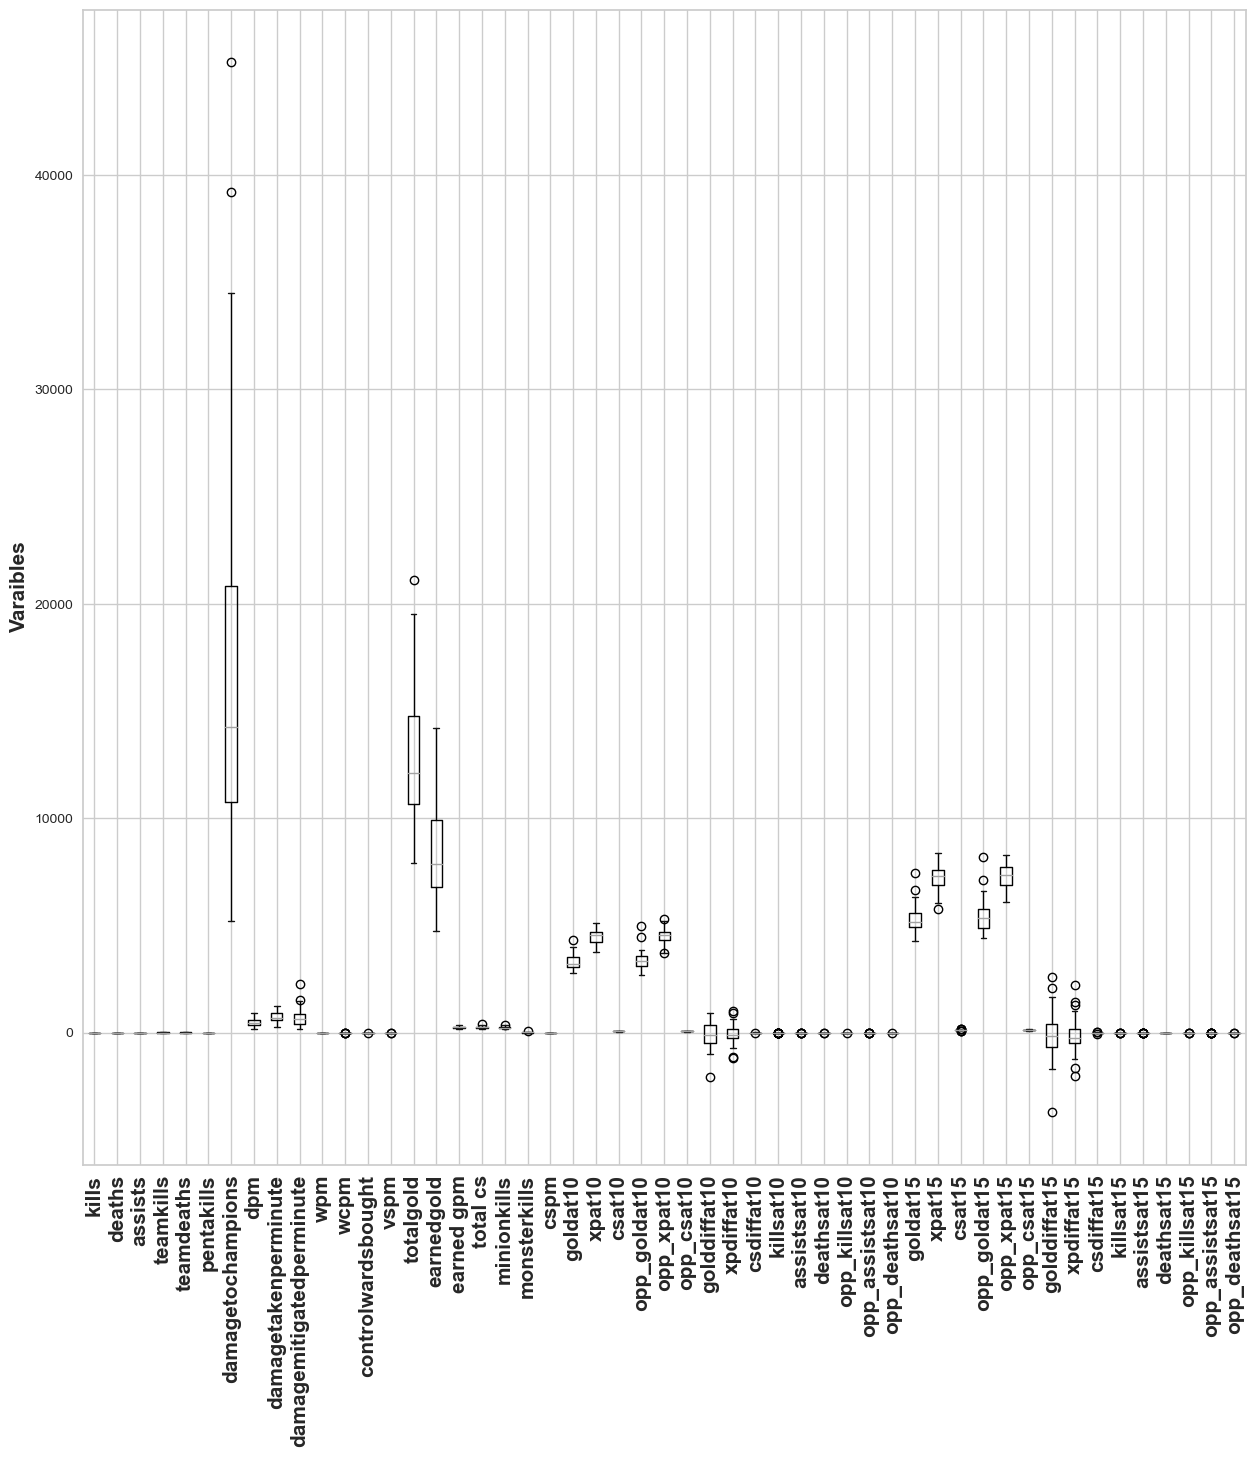

In [21]:
Wunder_analytical_data_df.boxplot(figsize=(15,15))
# plt.title("Boxplot of numerical data",fontsize=25, weight="bold")
# plt.xlabel("Value",fontsize=15, weight="bold")
plt.ylabel("Varaibles",fontsize=15, weight="bold")
plt.xticks(rotation=90,fontsize=15, weight="bold")
plt.show()

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
for column in Wunder_analytical_data_df.columns:
    lr,ur=remove_outlier(Wunder_analytical_data_df[column])
    Wunder_analytical_data_df[column]=np.where(Wunder_analytical_data_df[column]>ur,ur,Wunder_analytical_data_df[column])
    Wunder_analytical_data_df[column]=np.where(Wunder_analytical_data_df[column]<lr,lr,Wunder_analytical_data_df[column])

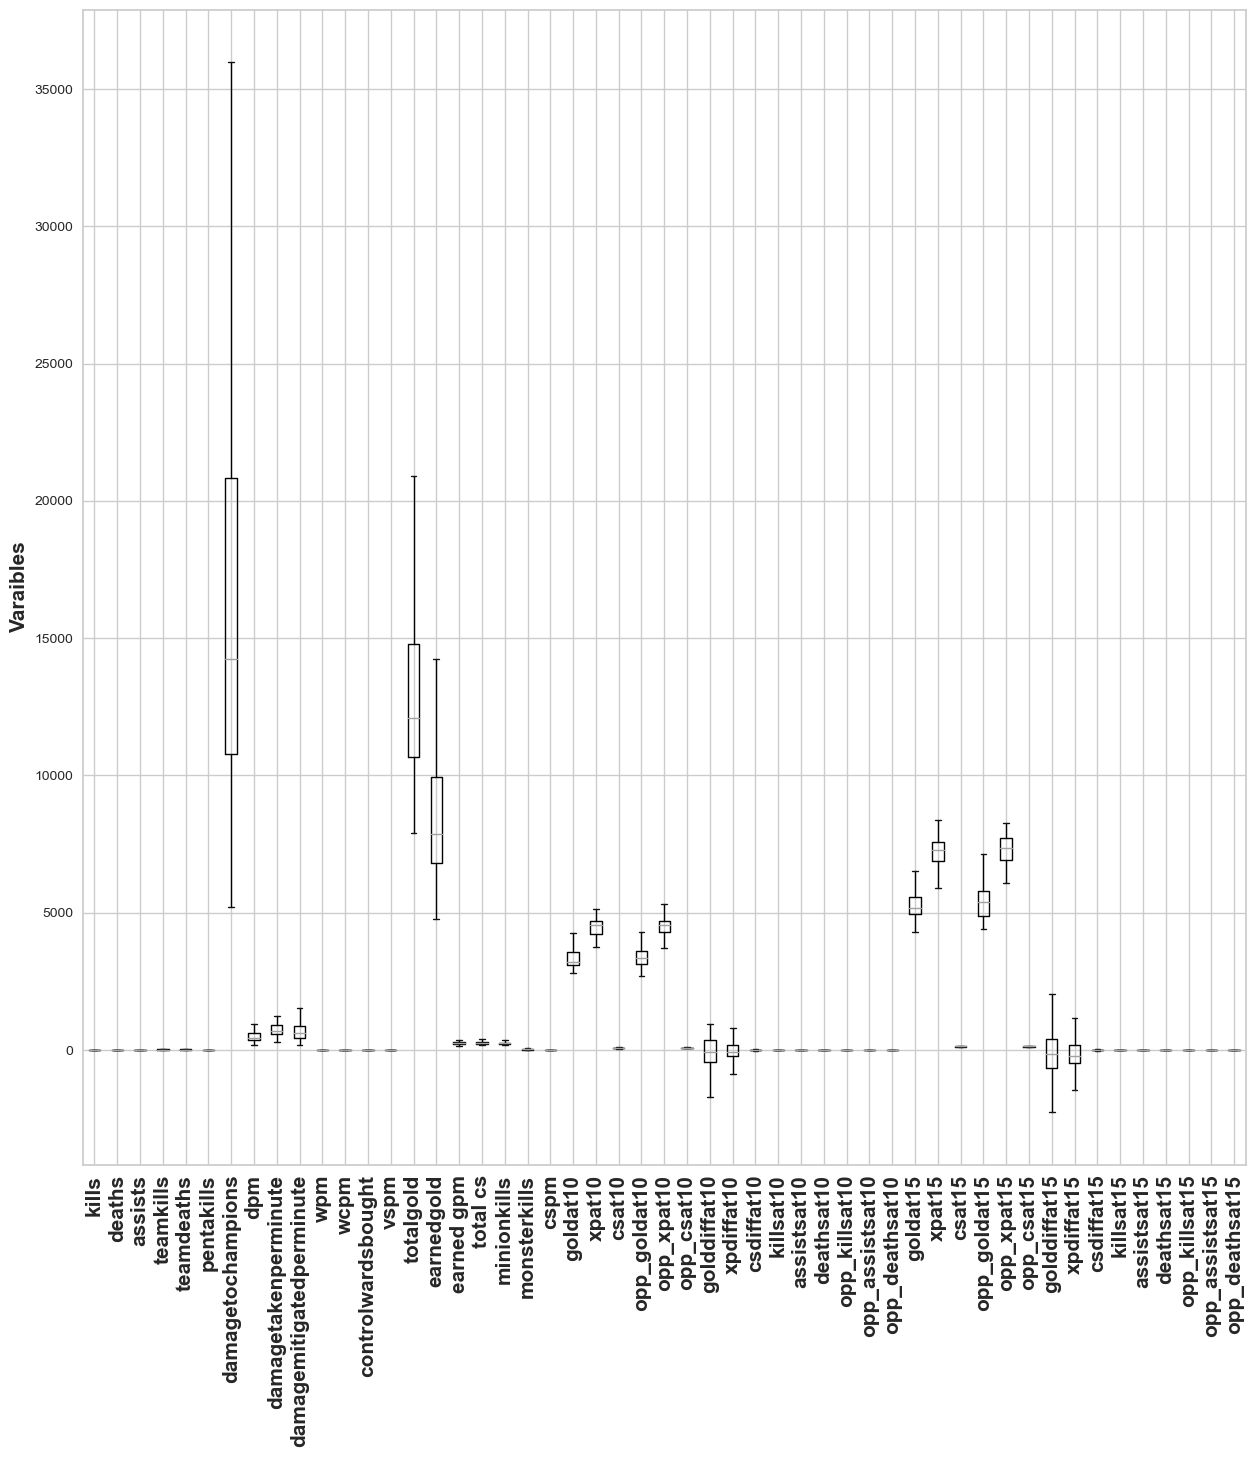

In [24]:
Wunder_analytical_data_df.boxplot(figsize=(15,15))
# plt.title("Boxplot of numerical data",fontsize=25, weight="bold")
# plt.xlabel("Value",fontsize=15, weight="bold")
plt.ylabel("Varaibles",fontsize=15, weight="bold")
plt.xticks(rotation=90,fontsize=15, weight="bold")
plt.show()

In [25]:
scalerm = StandardScaler()
Wunder_scaled_Data_df = pd.DataFrame(scalerm.fit_transform(Wunder_analytical_data_df),columns=Wunder_analytical_data_df.columns)
Wunder_scaled_Data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
kills,65.0,-4.099285e-17,1.007782,-1.401826,-0.862662,-0.323498,0.754829,2.372321
deaths,65.0,-1.161464e-16,1.007782,-1.725806,-1.164919,-0.043145,0.517742,2.200403
assists,65.0,-7.173749e-17,1.007782,-1.647210,-0.643441,0.025738,0.694917,2.702454
teamkills,65.0,3.757678e-17,1.007782,-1.799192,-0.706225,0.074466,0.699019,2.572676
teamdeaths,65.0,1.161464e-16,1.007782,-1.939255,-0.829367,-0.036590,0.756188,2.024631
pentakills,65.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
damagetochampions,65.0,2.374169e-16,1.007782,-1.474030,-0.747022,-0.292887,0.568534,2.541870
dpm,65.0,9.735802e-17,1.007782,-1.754227,-0.753176,-0.255517,0.609903,2.368969
damagetakenperminute,65.0,8.881784e-17,1.007782,-2.106217,-0.712921,-0.181382,0.885502,2.616424
damagemitigatedperminute,65.0,-1.708035e-17,1.007782,-1.543933,-0.815370,-0.193452,0.512174,2.503491


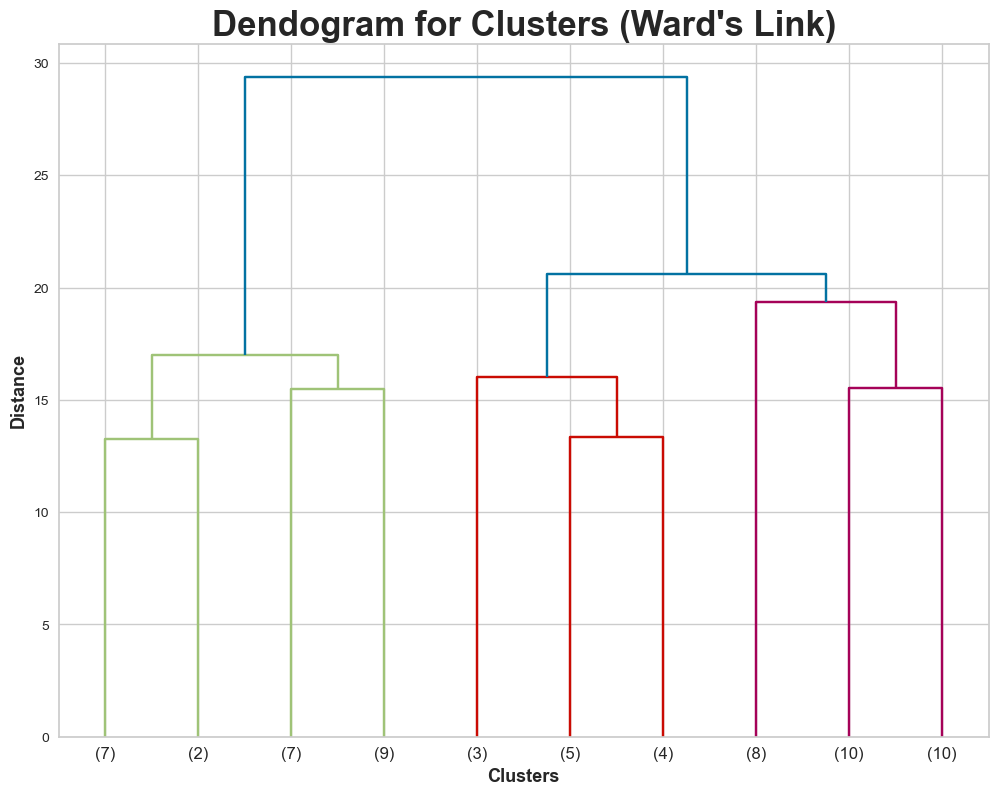

In [26]:
#Wardslink Dendogram
plt.figure(figsize=(12,9))
plt.title("Dendogram for Clusters (Ward's Link)",fontsize=25, weight="bold")

wardlink = linkage(Wunder_scaled_Data_df,method="ward",metric="euclidean")
dend = dendrogram(wardlink,truncate_mode="lastp",p=10)

plt.xlabel("Clusters",fontsize=13, weight="bold");
plt.ylabel("Distance",fontsize=13, weight="bold");

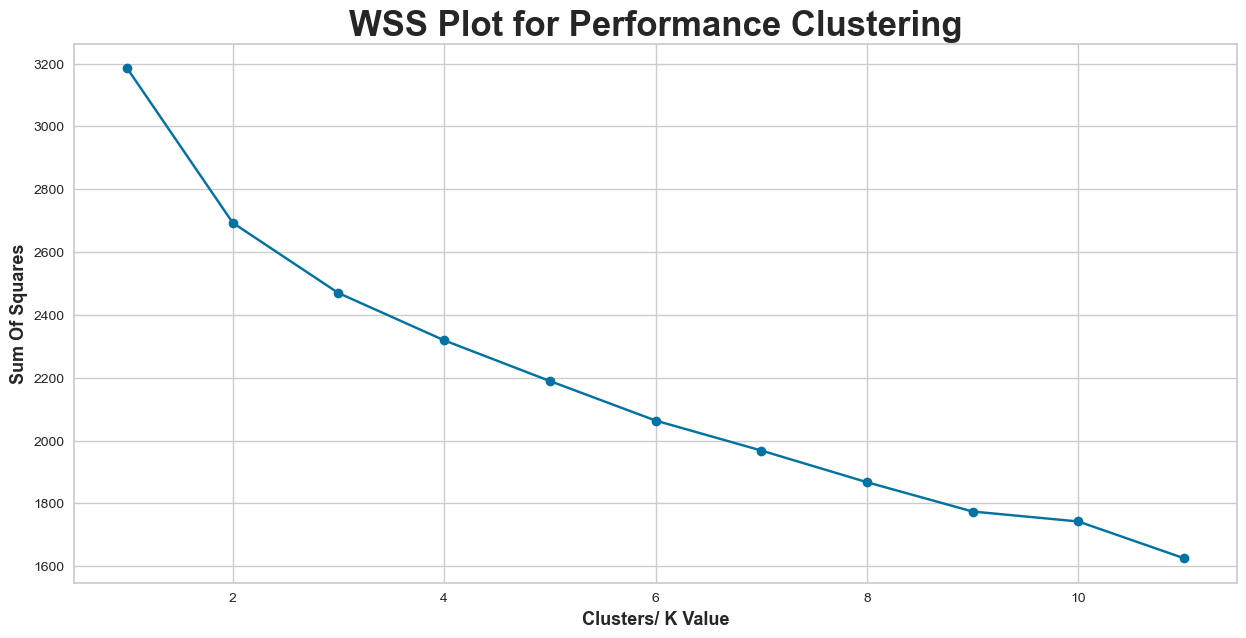

In [27]:
#Within Sum of Squares
wss=[]
for i in range(1,12):
    KM = KMeans(n_clusters=i,random_state=42)
    KM.fit(Wunder_scaled_Data_df)
    wss.append(KM.inertia_)
    
#WSS Plot
plt.figure(figsize=(15,7))
plt.title("WSS Plot for Performance Clustering",fontsize=25, weight="bold")

plt.plot(range(1,12), wss, 'o-');

plt.xlabel("Clusters/ K Value",fontsize=13, weight="bold");
plt.ylabel("Sum Of Squares",fontsize=13, weight="bold");

In [28]:
#Slihouette Scores
silhouette_scores = []

for k in range(2, 12):
    model_sil = KMeans(n_clusters=k,random_state=42)
    model_sil.fit(Wunder_scaled_Data_df)
    score = silhouette_score(Wunder_scaled_Data_df, model_sil.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.13057360597897483
Silhouette Score for k =  3 is 0.0992433017832523
Silhouette Score for k =  4 is 0.09283990845003749
Silhouette Score for k =  5 is 0.08399009455613936
Silhouette Score for k =  6 is 0.0761876488277743
Silhouette Score for k =  7 is 0.08404007353348629
Silhouette Score for k =  8 is 0.07607619641815201
Silhouette Score for k =  9 is 0.09154298226027441
Silhouette Score for k =  10 is 0.08561415872460121
Silhouette Score for k =  11 is 0.08466173289017322


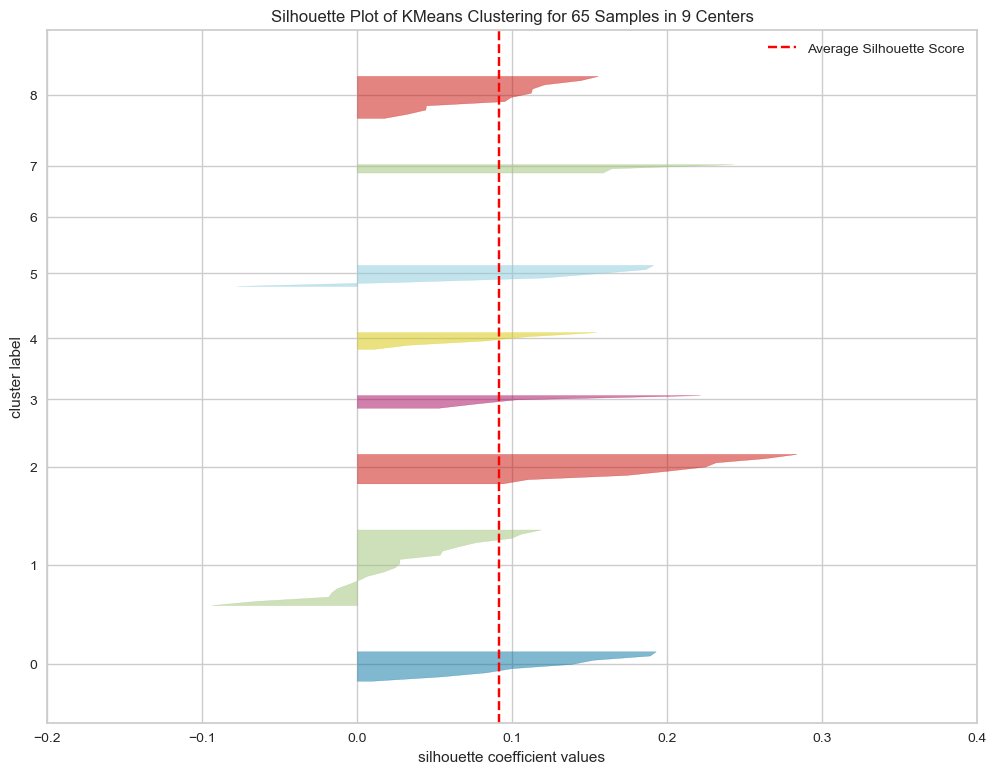

In [29]:
#k = 9/10 Seems to be the ideal value
plt.figure(figsize=(12,9))

k_means = KMeans(n_clusters = 9,random_state=42)
visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick')

visualizer.fit(Wunder_scaled_Data_df)        # Fit the data to the visualizer
visualizer.show();     # Finalize and render the figure

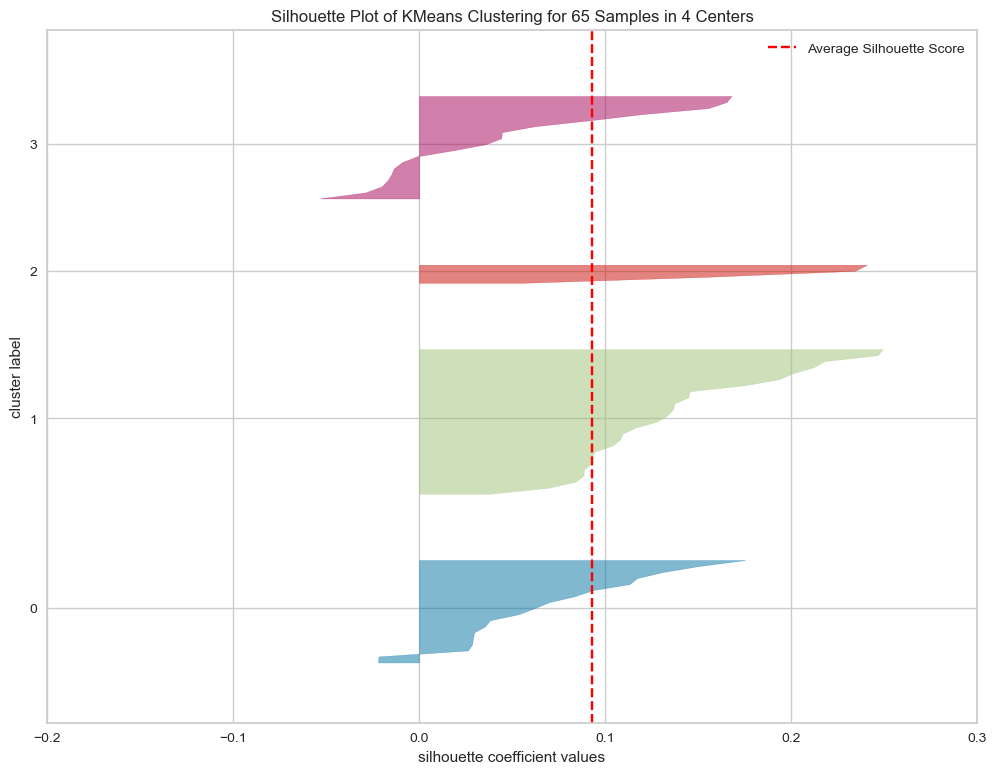

In [30]:
#k = 9/10 Seems to be the ideal value
plt.figure(figsize=(12,9))

k_means = KMeans(n_clusters = 4,random_state=42)
visualizer = SilhouetteVisualizer(k_means, colors='yellowbrick')

visualizer.fit(Wunder_scaled_Data_df)        # Fit the data to the visualizer
visualizer.show();     # Finalize and render the figure

In [31]:
#Obtain Labels for k=6
k_means = KMeans(n_clusters = 5,random_state=42)
k_means.fit(Wunder_scaled_Data_df)
labels = k_means.labels_

Wunder_data_df["Cluster_Label"] = labels
Wunder_data_df.head(20)

,split,playoffs,date,game,patch,side,position,playername,teamname,champion,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,Cluster_Label
2568,Spring,0,2022-01-14 20:10:24,1,12.01,Blue,top,Wunder,Fnatic,Gwen,...,-1117.0,108.0,10.0,0.0,0.0,2.0,2.0,1.0,0.0,3
2837,Spring,0,2022-01-15 19:34:12,1,12.01,Red,top,Wunder,Fnatic,Gragas,...,-1532.0,-228.0,-30.0,2.0,1.0,2.0,3.0,0.0,1.0,4
3113,Spring,0,2022-01-16 17:58:43,1,12.01,Red,top,Wunder,Fnatic,Gangplank,...,-142.0,-308.0,-5.0,1.0,3.0,1.0,2.0,1.0,1.0,3
5897,Spring,0,2022-01-21 17:09:26,1,12.01,Red,top,Wunder,Fnatic,Akali,...,1283.0,544.0,29.0,1.0,1.0,0.0,0.0,0.0,1.0,1
6312,Spring,0,2022-01-22 18:25:17,1,12.01,Blue,top,Wunder,Fnatic,Akali,...,395.0,-33.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,4
10169,Spring,0,2022-01-28 19:30:43,1,12.02,Red,top,Wunder,Fnatic,Renekton,...,457.0,457.0,20.0,0.0,1.0,2.0,1.0,3.0,1.0,2
10644,Spring,0,2022-01-29 19:01:25,1,12.02,Blue,top,Wunder,Fnatic,Gragas,...,-182.0,28.0,-23.0,1.0,0.0,0.0,0.0,0.0,0.0,4
13853,Spring,0,2022-02-04 19:46:21,1,12.02,Red,top,Wunder,Fnatic,Gragas,...,-985.0,-742.0,-27.0,0.0,0.0,0.0,0.0,0.0,0.0,4
14333,Spring,0,2022-02-05 18:24:28,1,12.02,Red,top,Wunder,Fnatic,Gwen,...,-526.0,-1202.0,-25.0,1.0,1.0,0.0,1.0,0.0,0.0,4
18252,Spring,0,2022-02-11 19:40:52,1,12.03,Blue,top,Wunder,Fnatic,Jayce,...,-244.0,-283.0,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0


In [32]:
Wunder_data_df.Cluster_Label.value_counts().sort_index()

0    13
1    10
2     9
3    14
4    19
Name: Cluster_Label, dtype: int64

In [33]:
main_clust_profile = Wunder_data_df[['cspm', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15' ,'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15','Cluster_Label']]

In [34]:
clust_profile = main_clust_profile.groupby("Cluster_Label").mean()
clust_profile['freq'] = Wunder_data_df.Cluster_Label.value_counts().sort_index()
clust_profile.style.highlight_max(color="red")

,cspm,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,freq
Cluster_Label,,,,,,,,,,,,,,,,,
0,7.841792,4917.615385,6804.384615,122.384615,5834.307692,7543.230769,128.538462,-916.692308,-738.846154,-6.153846,0.076923,0.538462,1.538462,0.846154,1.538462,0.307692,13
1,8.278060,6020.400000,7751.400000,142.400000,4739.000000,6766.100000,117.000000,1281.400000,985.300000,25.400000,1.100000,1.800000,0.000000,0.200000,0.500000,1.500000,10
2,7.331822,5394.111111,6686.888889,117.666667,4943.222222,6704.666667,109.222222,450.888889,-17.777778,8.444444,1.444444,1.000000,1.888889,0.444444,2.222222,1.222222,9
3,8.110457,5154.928571,7065.428571,130.000000,5570.142857,7473.357143,128.357143,-415.214286,-407.928571,1.642857,0.142857,0.642857,1.214286,1.142857,0.500000,0.428571,14
4,8.029458,5209.263158,7499.263158,135.684211,5509.315789,7562.578947,139.473684,-300.052632,-63.315789,-3.789474,0.368421,0.631579,0.473684,0.578947,0.210526,0.263158,19


In [35]:
clust_profile.style.highlight_min(color="blue")

,cspm,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,freq
Cluster_Label,,,,,,,,,,,,,,,,,
0,7.841792,4917.615385,6804.384615,122.384615,5834.307692,7543.230769,128.538462,-916.692308,-738.846154,-6.153846,0.076923,0.538462,1.538462,0.846154,1.538462,0.307692,13
1,8.278060,6020.400000,7751.400000,142.400000,4739.000000,6766.100000,117.000000,1281.400000,985.300000,25.400000,1.100000,1.800000,0.000000,0.200000,0.500000,1.500000,10
2,7.331822,5394.111111,6686.888889,117.666667,4943.222222,6704.666667,109.222222,450.888889,-17.777778,8.444444,1.444444,1.000000,1.888889,0.444444,2.222222,1.222222,9
3,8.110457,5154.928571,7065.428571,130.000000,5570.142857,7473.357143,128.357143,-415.214286,-407.928571,1.642857,0.142857,0.642857,1.214286,1.142857,0.500000,0.428571,14
4,8.029458,5209.263158,7499.263158,135.684211,5509.315789,7562.578947,139.473684,-300.052632,-63.315789,-3.789474,0.368421,0.631579,0.473684,0.578947,0.210526,0.263158,19


In [36]:
# Code

mapping = {0:'Bad', 1:'Excellent', 2:'Above Average', 3:'Below Average', 4:'Satisfactory'}
Wunder_data_df["Cluster_Label"] = [mapping[i] for i in Wunder_data_df["Cluster_Label"]]
Wunder_data_df.head()


,split,playoffs,date,game,patch,side,position,playername,teamname,champion,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,Cluster_Label
2568,Spring,0,2022-01-14 20:10:24,1,12.01,Blue,top,Wunder,Fnatic,Gwen,...,-1117.0,108.0,10.0,0.0,0.0,2.0,2.0,1.0,0.0,Below Average
2837,Spring,0,2022-01-15 19:34:12,1,12.01,Red,top,Wunder,Fnatic,Gragas,...,-1532.0,-228.0,-30.0,2.0,1.0,2.0,3.0,0.0,1.0,Satisfactory
3113,Spring,0,2022-01-16 17:58:43,1,12.01,Red,top,Wunder,Fnatic,Gangplank,...,-142.0,-308.0,-5.0,1.0,3.0,1.0,2.0,1.0,1.0,Below Average
5897,Spring,0,2022-01-21 17:09:26,1,12.01,Red,top,Wunder,Fnatic,Akali,...,1283.0,544.0,29.0,1.0,1.0,0.0,0.0,0.0,1.0,Excellent
6312,Spring,0,2022-01-22 18:25:17,1,12.01,Blue,top,Wunder,Fnatic,Akali,...,395.0,-33.0,15.0,0.0,0.0,1.0,0.0,0.0,0.0,Satisfactory


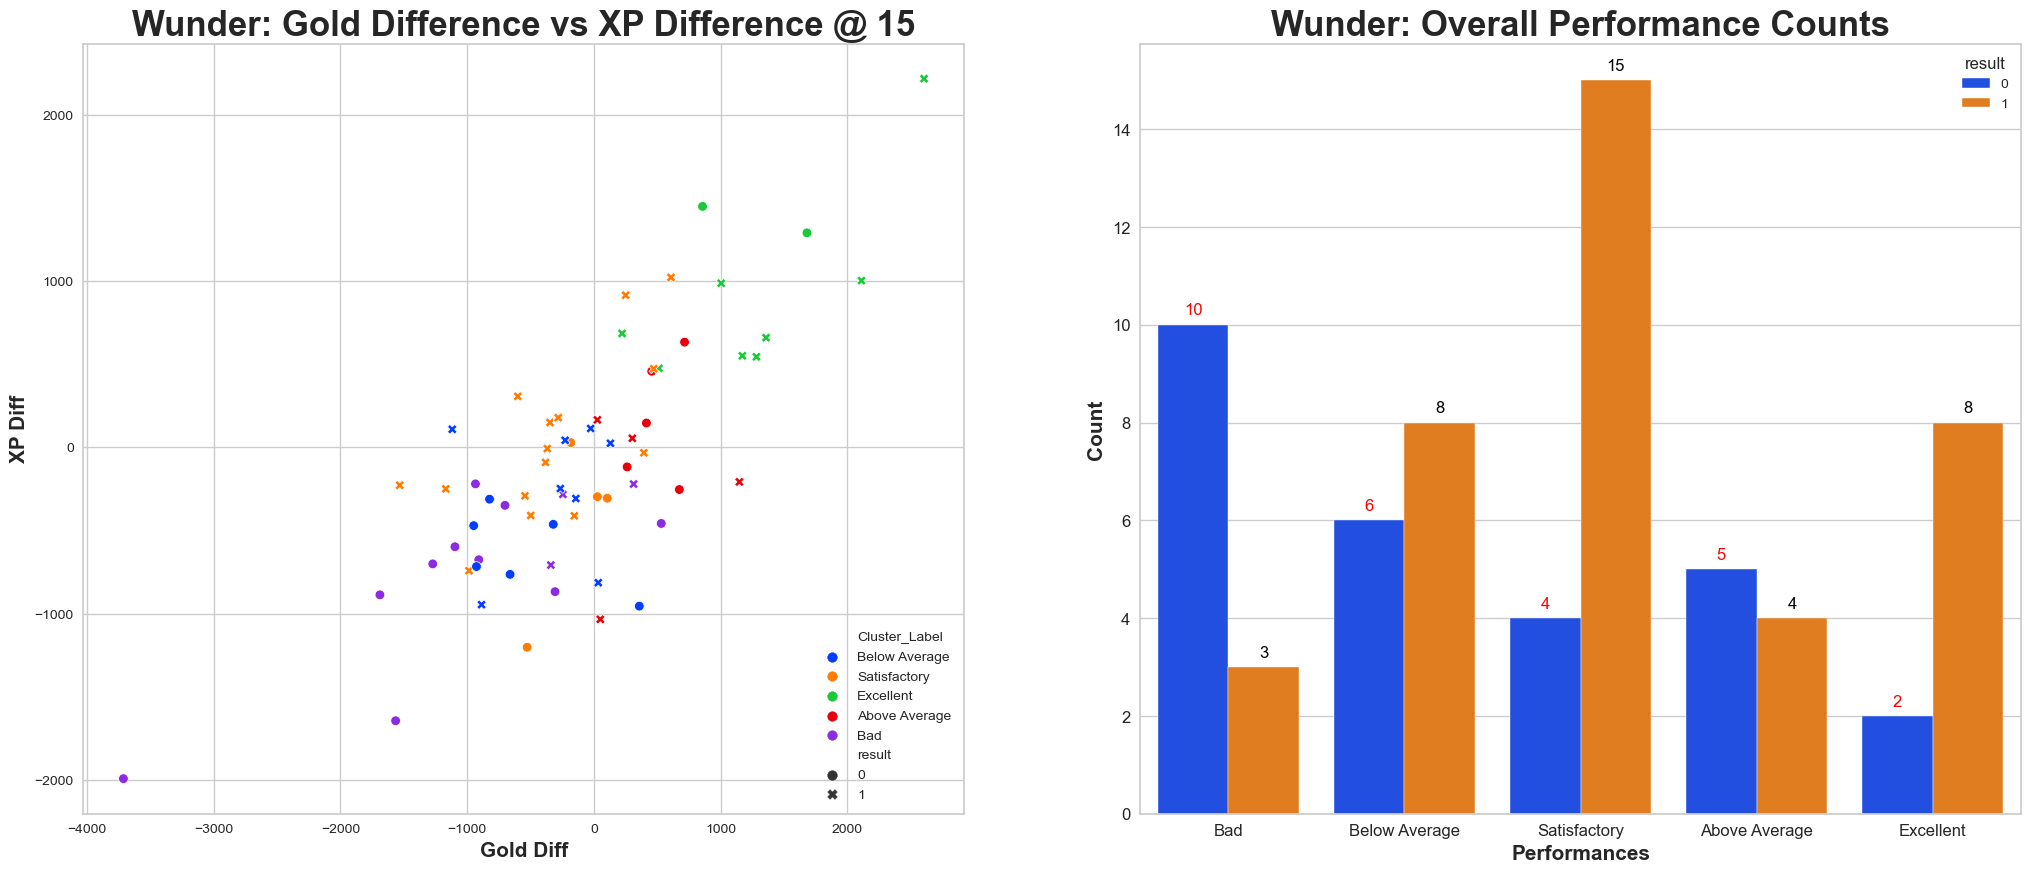

In [37]:
plt.figure(figsize=(25,10))

sns.despine()
sns.set_style("whitegrid")

#XP diff vs Gold Difference
plt.subplot(1,2,1)
sns.scatterplot(data=Wunder_data_df,x="golddiffat15",y="xpdiffat15",hue="Cluster_Label",style="result",palette="bright")

plt.title("Wunder: Gold Difference vs XP Difference @ 15",fontsize=25, weight="bold")
plt.xlabel("Gold Diff",fontsize=15, weight="bold")
plt.ylabel("XP Diff",fontsize=15, weight="bold")
plt.legend(loc='lower right')

#Overall Count of performances
plt.subplot(1,2,2)
ax = sns.countplot(data=Wunder_data_df,x="Cluster_Label",hue="result",order=['Bad','Below Average','Satisfactory','Above Average','Excellent'],palette="bright")
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation = 0, fontsize = 12,padding =5);
ax.bar_label(ax.containers[1], label_type='edge', color = 'black',rotation = 0, fontsize = 12,padding =5);
plt.title("Wunder: Overall Performance Counts",fontsize=25, weight="bold")
plt.xlabel("Performances",fontsize=15, weight="bold")
plt.ylabel("Count",fontsize=15, weight="bold")
ax.tick_params(labelsize = 12)

In [38]:
# # 3D-Plots using plotly
# fig = pnx.scatter_3d(Wunder_data_df,x="golddiffat15",y="xpdiffat15",z="cspm",color ='Cluster_Label',symbol="result",width=800, height=800)
# fig.update(layout_coloraxis_showscale=False)       
# fig.show()

## Razork

In [39]:
Razork_data_df = lec2022_data_df[lec2022_data_df["playername"]=="Razork"]
Razork_data_df.drop(['datacompleteness', 'league', 'year', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim','heralds', 'opp_heralds', 'firstbaron',
                     'barons','opp_barons', 'firsttower', 'towers', 'opp_towers', 'firstmidtower','firsttothreetowers', 'turretplates', 'opp_turretplates',
                     'damageshare','earnedgoldshare', 'goldspent', 'gspd', 'monsterkillsownjungle', 'monsterkillsenemyjungle'],axis=1,inplace=True)
Razork_data_df.head()

,split,playoffs,date,game,patch,side,position,playername,teamname,champion,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
2569,Spring,0,2022-01-14 20:10:24,1,12.01,Blue,jng,Razork,Fnatic,Xin Zhao,...,116.0,-2052.0,-2178.0,-30.0,0.0,0.0,1.0,2.0,2.0,0.0
2838,Spring,0,2022-01-15 19:34:12,1,12.01,Red,jng,Razork,Fnatic,Viego,...,110.0,-1179.0,-1265.0,-2.0,1.0,0.0,1.0,1.0,4.0,1.0
3114,Spring,0,2022-01-16 17:58:43,1,12.01,Red,jng,Razork,Fnatic,Lee Sin,...,83.0,507.0,57.0,14.0,2.0,1.0,2.0,1.0,2.0,0.0
5898,Spring,0,2022-01-21 17:09:26,1,12.01,Red,jng,Razork,Fnatic,Lee Sin,...,78.0,863.0,1113.0,22.0,2.0,2.0,0.0,1.0,0.0,2.0
6313,Spring,0,2022-01-22 18:25:17,1,12.01,Blue,jng,Razork,Fnatic,Xin Zhao,...,96.0,-547.0,-572.0,-12.0,1.0,3.0,2.0,2.0,1.0,1.0


In [40]:
Razork_data_df["result"] = Razork_data_df.result.astype("category")

Razork_analytical_data_df = Razork_data_df.drop(['split', 'playoffs', 'date', 'game', 'patch', 'side', 'position', 'playername', 'teamname', 'champion', 'gamelength', 'result', 'firstblood', 'team kpm', 'ckpm',
                                                 'inhibitors', 'opp_inhibitors', 'wardsplaced', 'wardskilled', 'visionscore'],axis=1)
Razork_analytical_data_df.head()

for column in Razork_analytical_data_df.columns:
    lr,ur=remove_outlier(Razork_analytical_data_df[column])
    Razork_analytical_data_df[column]=np.where(Razork_analytical_data_df[column]>ur,ur,Razork_analytical_data_df[column])
    Razork_analytical_data_df[column]=np.where(Razork_analytical_data_df[column]<lr,lr,Razork_analytical_data_df[column])

scalerm = StandardScaler()
Razork_scaled_Data_df = pd.DataFrame(scalerm.fit_transform(Razork_analytical_data_df),columns=Razork_analytical_data_df.columns)

k_means = KMeans(n_clusters = 5,random_state=42)
k_means.fit(Razork_scaled_Data_df)
labels = k_means.labels_

Razork_data_df["Cluster_Label"] = labels

main_clust_profile = Razork_data_df[['cspm', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15' ,'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15','Cluster_Label']]
clust_profile = main_clust_profile.groupby("Cluster_Label").mean()
clust_profile['freq'] = Razork_data_df.Cluster_Label.value_counts().sort_index()



In [41]:
clust_profile.style.highlight_max(color="red")

,cspm,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,freq
Cluster_Label,,,,,,,,,,,,,,,,,
0,4.556129,4956.142857,5269.000000,92.142857,4692.142857,4975.285714,82.428571,264.000000,293.714286,9.714286,1.285714,1.000000,0.285714,0.857143,0.857143,0.428571,7
1,4.736612,4452.437500,4870.000000,85.000000,4798.000000,5018.687500,82.312500,-345.562500,-148.687500,2.687500,0.250000,1.500000,0.937500,1.000000,1.312500,0.250000,16
2,5.354856,5398.125000,5652.125000,94.250000,5062.562500,5333.500000,88.937500,335.562500,318.625000,5.312500,2.125000,1.500000,1.750000,1.375000,2.125000,1.125000,16
3,5.917324,5353.647059,5623.529412,96.117647,4521.235294,5010.117647,83.235294,832.411765,613.411765,12.882353,1.000000,2.941176,0.411765,0.470588,1.235294,1.352941,17
4,5.599244,4910.555556,5351.000000,93.444444,5966.444444,5835.666667,98.777778,-1055.888889,-484.666667,-5.333333,0.888889,1.000000,1.222222,2.666667,1.888889,0.555556,9


In [42]:
clust_profile.style.highlight_min(color="blue")

,cspm,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,freq
Cluster_Label,,,,,,,,,,,,,,,,,
0,4.556129,4956.142857,5269.000000,92.142857,4692.142857,4975.285714,82.428571,264.000000,293.714286,9.714286,1.285714,1.000000,0.285714,0.857143,0.857143,0.428571,7
1,4.736612,4452.437500,4870.000000,85.000000,4798.000000,5018.687500,82.312500,-345.562500,-148.687500,2.687500,0.250000,1.500000,0.937500,1.000000,1.312500,0.250000,16
2,5.354856,5398.125000,5652.125000,94.250000,5062.562500,5333.500000,88.937500,335.562500,318.625000,5.312500,2.125000,1.500000,1.750000,1.375000,2.125000,1.125000,16
3,5.917324,5353.647059,5623.529412,96.117647,4521.235294,5010.117647,83.235294,832.411765,613.411765,12.882353,1.000000,2.941176,0.411765,0.470588,1.235294,1.352941,17
4,5.599244,4910.555556,5351.000000,93.444444,5966.444444,5835.666667,98.777778,-1055.888889,-484.666667,-5.333333,0.888889,1.000000,1.222222,2.666667,1.888889,0.555556,9


In [43]:
mapping = {4:'Bad', 3:'Excellent', 0:'Above Average', 1:'Below Average', 2:'Satisfactory'}
Razork_data_df["Cluster_Label"] = [mapping[i] for i in Razork_data_df["Cluster_Label"]]
Razork_data_df.head()

,split,playoffs,date,game,patch,side,position,playername,teamname,champion,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,Cluster_Label
2569,Spring,0,2022-01-14 20:10:24,1,12.01,Blue,jng,Razork,Fnatic,Xin Zhao,...,-2052.0,-2178.0,-30.0,0.0,0.0,1.0,2.0,2.0,0.0,Bad
2838,Spring,0,2022-01-15 19:34:12,1,12.01,Red,jng,Razork,Fnatic,Viego,...,-1179.0,-1265.0,-2.0,1.0,0.0,1.0,1.0,4.0,1.0,Bad
3114,Spring,0,2022-01-16 17:58:43,1,12.01,Red,jng,Razork,Fnatic,Lee Sin,...,507.0,57.0,14.0,2.0,1.0,2.0,1.0,2.0,0.0,Satisfactory
5898,Spring,0,2022-01-21 17:09:26,1,12.01,Red,jng,Razork,Fnatic,Lee Sin,...,863.0,1113.0,22.0,2.0,2.0,0.0,1.0,0.0,2.0,Excellent
6313,Spring,0,2022-01-22 18:25:17,1,12.01,Blue,jng,Razork,Fnatic,Xin Zhao,...,-547.0,-572.0,-12.0,1.0,3.0,2.0,2.0,1.0,1.0,Bad


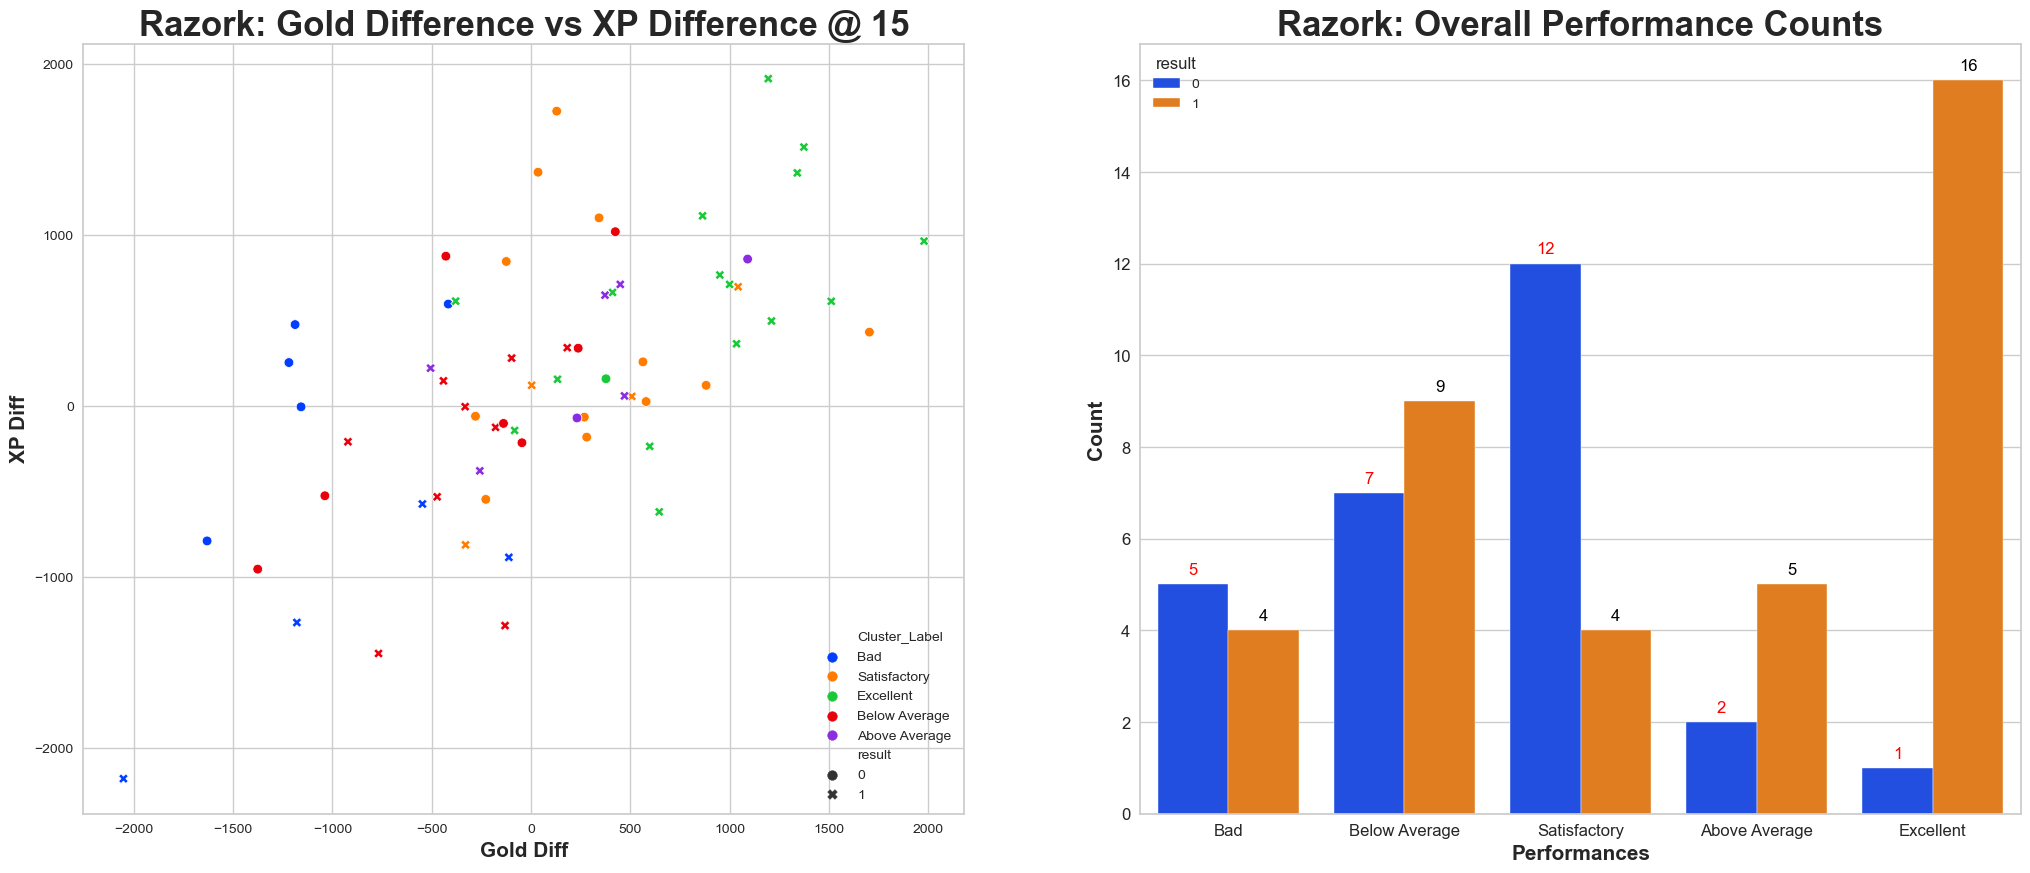

In [44]:
plt.figure(figsize=(25,10))

sns.despine()
sns.set_style("whitegrid")

#XP diff vs Gold Difference
plt.subplot(1,2,1)
sns.scatterplot(data=Razork_data_df,x="golddiffat15",y="xpdiffat15",hue="Cluster_Label",style="result",palette="bright")

plt.title("Razork: Gold Difference vs XP Difference @ 15",fontsize=25, weight="bold")
plt.xlabel("Gold Diff",fontsize=15, weight="bold")
plt.ylabel("XP Diff",fontsize=15, weight="bold")
plt.legend(loc='lower right')

#Overall Count of performances
plt.subplot(1,2,2)
ax = sns.countplot(data=Razork_data_df,x="Cluster_Label",hue="result",order=['Bad','Below Average','Satisfactory','Above Average','Excellent'],palette="bright")
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation = 0, fontsize = 12,padding =5);
ax.bar_label(ax.containers[1], label_type='edge', color = 'black',rotation = 0, fontsize = 12,padding =5);
plt.title("Razork: Overall Performance Counts",fontsize=25, weight="bold")
plt.xlabel("Performances",fontsize=15, weight="bold")
plt.ylabel("Count",fontsize=15, weight="bold")
ax.tick_params(labelsize = 12)

## Humanoid

In [45]:
Humanoid_data_df = lec2022_data_df[lec2022_data_df["playername"]=="Humanoid"]
Humanoid_data_df.drop(['datacompleteness', 'league', 'year', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim','heralds', 'opp_heralds', 'firstbaron',
                     'barons','opp_barons', 'firsttower', 'towers', 'opp_towers', 'firstmidtower','firsttothreetowers', 'turretplates', 'opp_turretplates',
                     'damageshare','earnedgoldshare', 'goldspent', 'gspd', 'monsterkillsownjungle', 'monsterkillsenemyjungle'],axis=1,inplace=True)
Humanoid_data_df.head()

,split,playoffs,date,game,patch,side,position,playername,teamname,champion,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
2570,Spring,0,2022-01-14 20:10:24,1,12.01,Blue,mid,Humanoid,Fnatic,Twisted Fate,...,143.0,401.0,-469.0,-12.0,0.0,1.0,1.0,0.0,0.0,0.0
2839,Spring,0,2022-01-15 19:34:12,1,12.01,Red,mid,Humanoid,Fnatic,LeBlanc,...,123.0,5.0,916.0,29.0,1.0,0.0,1.0,1.0,2.0,1.0
3115,Spring,0,2022-01-16 17:58:43,1,12.01,Red,mid,Humanoid,Fnatic,Viktor,...,147.0,351.0,691.0,19.0,0.0,1.0,0.0,0.0,0.0,1.0
5899,Spring,0,2022-01-21 17:09:26,1,12.01,Red,mid,Humanoid,Fnatic,Orianna,...,121.0,844.0,275.0,24.0,0.0,2.0,1.0,0.0,1.0,0.0
6314,Spring,0,2022-01-22 18:25:17,1,12.01,Blue,mid,Humanoid,Fnatic,Twisted Fate,...,128.0,2671.0,1255.0,33.0,3.0,2.0,0.0,1.0,0.0,2.0


In [46]:
Humanoid_data_df["result"] = Humanoid_data_df.result.astype("category")

Humanoid_analytical_data_df = Humanoid_data_df.drop(['split', 'playoffs', 'date', 'game', 'patch', 'side', 'position', 'playername', 'teamname', 'champion', 'gamelength', 'result', 'firstblood', 'team kpm', 'ckpm',
                                                 'inhibitors', 'opp_inhibitors', 'wardsplaced', 'wardskilled', 'visionscore'],axis=1)
Humanoid_analytical_data_df.head()

for column in Humanoid_analytical_data_df.columns:
    lr,ur=remove_outlier(Humanoid_analytical_data_df[column])
    Humanoid_analytical_data_df[column]=np.where(Humanoid_analytical_data_df[column]>ur,ur,Humanoid_analytical_data_df[column])
    Humanoid_analytical_data_df[column]=np.where(Humanoid_analytical_data_df[column]<lr,lr,Humanoid_analytical_data_df[column])

scalerm = StandardScaler()
Humanoid_scaled_Data_df = pd.DataFrame(scalerm.fit_transform(Humanoid_analytical_data_df),columns=Humanoid_analytical_data_df.columns)

k_means = KMeans(n_clusters = 5,random_state=42)
k_means.fit(Humanoid_scaled_Data_df)
labels = k_means.labels_

Humanoid_data_df["Cluster_Label"] = labels

main_clust_profile = Humanoid_data_df[['cspm', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15' ,'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15','Cluster_Label']]
clust_profile = main_clust_profile.groupby("Cluster_Label").mean()
clust_profile['freq'] = Humanoid_data_df.Cluster_Label.value_counts().sort_index()


In [47]:
clust_profile.style.highlight_max(color="red")

,cspm,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,freq
Cluster_Label,,,,,,,,,,,,,,,,,
0,8.628900,5977.400000,7299.600000,136.300000,5115.600000,6576.600000,112.800000,861.800000,723.000000,23.500000,1.100000,2.000000,0.700000,1.000000,1.400000,1.300000,10
1,8.440600,5574.545455,6990.909091,136.090909,6225.090909,7629.727273,138.272727,-650.545455,-638.818182,-2.181818,0.454545,0.636364,1.727273,2.000000,1.909091,0.272727,11
2,10.043307,6533.071429,8068.642857,156.214286,5337.357143,7066.928571,133.928571,1195.714286,1001.714286,22.285714,1.357143,1.000000,0.285714,0.642857,0.642857,1.142857,14
3,8.657994,5683.882353,7685.117647,148.705882,5534.823529,7326.647059,138.823529,149.058824,358.470588,9.882353,0.882353,0.588235,0.470588,0.705882,1.000000,0.588235,17
4,8.365962,5354.769231,7307.461538,139.307692,5726.846154,7815.153846,151.000000,-372.076923,-507.692308,-11.692308,0.461538,0.615385,0.615385,0.461538,0.461538,0.307692,13


In [48]:
clust_profile.style.highlight_min(color="blue")

,cspm,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,freq
Cluster_Label,,,,,,,,,,,,,,,,,
0,8.628900,5977.400000,7299.600000,136.300000,5115.600000,6576.600000,112.800000,861.800000,723.000000,23.500000,1.100000,2.000000,0.700000,1.000000,1.400000,1.300000,10
1,8.440600,5574.545455,6990.909091,136.090909,6225.090909,7629.727273,138.272727,-650.545455,-638.818182,-2.181818,0.454545,0.636364,1.727273,2.000000,1.909091,0.272727,11
2,10.043307,6533.071429,8068.642857,156.214286,5337.357143,7066.928571,133.928571,1195.714286,1001.714286,22.285714,1.357143,1.000000,0.285714,0.642857,0.642857,1.142857,14
3,8.657994,5683.882353,7685.117647,148.705882,5534.823529,7326.647059,138.823529,149.058824,358.470588,9.882353,0.882353,0.588235,0.470588,0.705882,1.000000,0.588235,17
4,8.365962,5354.769231,7307.461538,139.307692,5726.846154,7815.153846,151.000000,-372.076923,-507.692308,-11.692308,0.461538,0.615385,0.615385,0.461538,0.461538,0.307692,13


In [49]:
mapping = {1:'Bad', 4:'Below Average', 3:'Satisfactory', 0:'Above Average', 2:'Excellent'}
Humanoid_data_df["Cluster_Label"] = [mapping[i] for i in Humanoid_data_df["Cluster_Label"]]
Humanoid_data_df.head()

,split,playoffs,date,game,patch,side,position,playername,teamname,champion,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,Cluster_Label
2570,Spring,0,2022-01-14 20:10:24,1,12.01,Blue,mid,Humanoid,Fnatic,Twisted Fate,...,401.0,-469.0,-12.0,0.0,1.0,1.0,0.0,0.0,0.0,Below Average
2839,Spring,0,2022-01-15 19:34:12,1,12.01,Red,mid,Humanoid,Fnatic,LeBlanc,...,5.0,916.0,29.0,1.0,0.0,1.0,1.0,2.0,1.0,Satisfactory
3115,Spring,0,2022-01-16 17:58:43,1,12.01,Red,mid,Humanoid,Fnatic,Viktor,...,351.0,691.0,19.0,0.0,1.0,0.0,0.0,0.0,1.0,Excellent
5899,Spring,0,2022-01-21 17:09:26,1,12.01,Red,mid,Humanoid,Fnatic,Orianna,...,844.0,275.0,24.0,0.0,2.0,1.0,0.0,1.0,0.0,Above Average
6314,Spring,0,2022-01-22 18:25:17,1,12.01,Blue,mid,Humanoid,Fnatic,Twisted Fate,...,2671.0,1255.0,33.0,3.0,2.0,0.0,1.0,0.0,2.0,Excellent


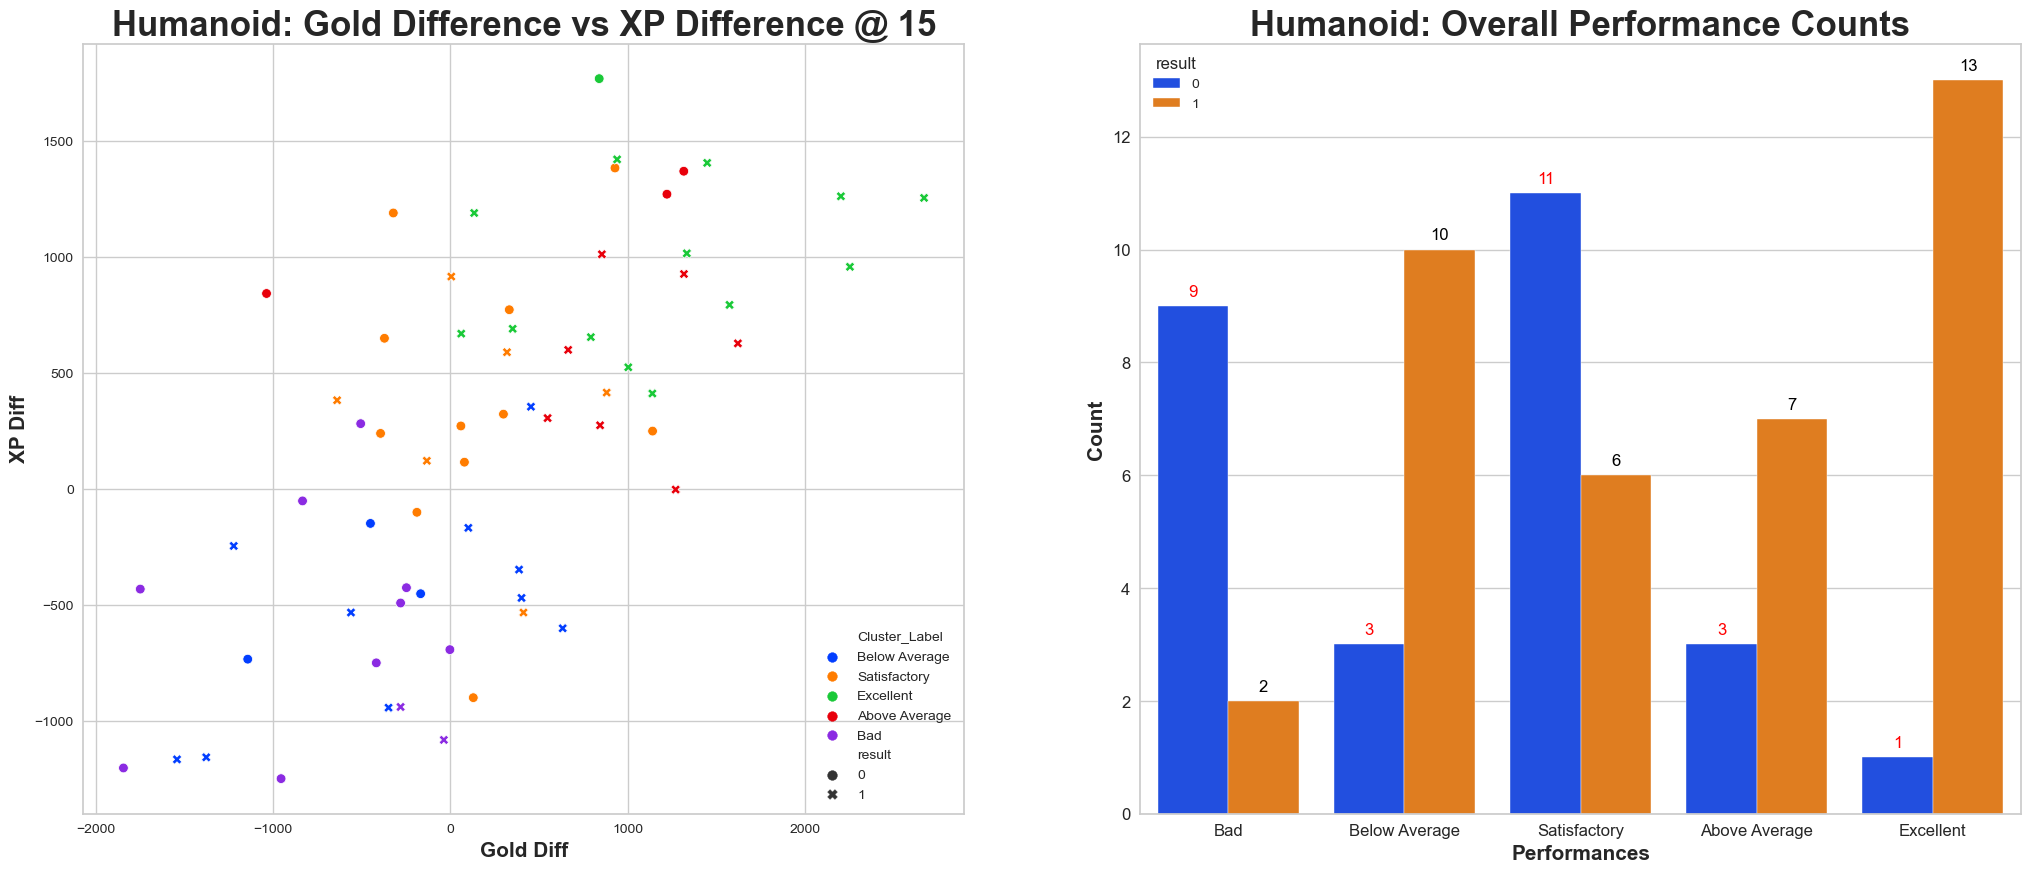

In [50]:
plt.figure(figsize=(25,10))

sns.despine()
sns.set_style("whitegrid")

#XP diff vs Gold Difference
plt.subplot(1,2,1)
sns.scatterplot(data=Humanoid_data_df,x="golddiffat15",y="xpdiffat15",hue="Cluster_Label",style="result",palette="bright")

plt.title("Humanoid: Gold Difference vs XP Difference @ 15",fontsize=25, weight="bold")
plt.xlabel("Gold Diff",fontsize=15, weight="bold")
plt.ylabel("XP Diff",fontsize=15, weight="bold")
plt.legend(loc='lower right')

#Overall Count of performances
plt.subplot(1,2,2)
ax = sns.countplot(data=Humanoid_data_df,x="Cluster_Label",hue="result",order=['Bad','Below Average','Satisfactory','Above Average','Excellent'],palette="bright")
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation = 0, fontsize = 12,padding =5);
ax.bar_label(ax.containers[1], label_type='edge', color = 'black',rotation = 0, fontsize = 12,padding =5);
plt.title("Humanoid: Overall Performance Counts",fontsize=25, weight="bold")
plt.xlabel("Performances",fontsize=15, weight="bold")
plt.ylabel("Count",fontsize=15, weight="bold")
ax.tick_params(labelsize = 12)

## Upset

In [51]:
Upset_data_df = lec2022_data_df[lec2022_data_df["playername"]=="Upset"]
Upset_data_df.drop(['datacompleteness', 'league', 'year', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim','heralds', 'opp_heralds', 'firstbaron',
                     'barons','opp_barons', 'firsttower', 'towers', 'opp_towers', 'firstmidtower','firsttothreetowers', 'turretplates', 'opp_turretplates',
                     'damageshare','earnedgoldshare', 'goldspent', 'gspd', 'monsterkillsownjungle', 'monsterkillsenemyjungle'],axis=1,inplace=True)
Upset_data_df.head()

,split,playoffs,date,game,patch,side,position,playername,teamname,champion,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
2571,Spring,0,2022-01-14 20:10:24,1,12.01,Blue,bot,Upset,Fnatic,Jhin,...,112.0,453.0,163.0,30.0,0.0,1.0,0.0,0.0,1.0,1.0
2840,Spring,0,2022-01-15 19:34:12,1,12.01,Red,bot,Upset,Fnatic,Jhin,...,139.0,-531.0,540.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0
3116,Spring,0,2022-01-16 17:58:43,1,12.01,Red,bot,Upset,Fnatic,Aphelios,...,118.0,1551.0,313.0,31.0,1.0,2.0,0.0,1.0,1.0,1.0
5900,Spring,0,2022-01-21 17:09:26,1,12.01,Red,bot,Upset,Fnatic,Jinx,...,145.0,179.0,-70.0,-16.0,1.0,2.0,0.0,0.0,0.0,0.0
6315,Spring,0,2022-01-22 18:25:17,1,12.01,Blue,bot,Upset,Fnatic,Caitlyn,...,146.0,275.0,766.0,-10.0,1.0,2.0,0.0,0.0,1.0,1.0


In [52]:
Upset_data_df["result"] = Upset_data_df.result.astype("category")

Upset_analytical_data_df = Upset_data_df.drop(['split', 'playoffs', 'date', 'game', 'patch', 'side', 'position', 'playername', 'teamname', 'champion', 'gamelength', 'result', 'firstblood', 'team kpm', 'ckpm',
                                                 'inhibitors', 'opp_inhibitors', 'wardsplaced', 'wardskilled', 'visionscore'],axis=1)
Upset_analytical_data_df.head()

for column in Upset_analytical_data_df.columns:
    lr,ur=remove_outlier(Upset_analytical_data_df[column])
    Upset_analytical_data_df[column]=np.where(Upset_analytical_data_df[column]>ur,ur,Upset_analytical_data_df[column])
    Upset_analytical_data_df[column]=np.where(Upset_analytical_data_df[column]<lr,lr,Upset_analytical_data_df[column])

scalerm = StandardScaler()
Upset_scaled_Data_df = pd.DataFrame(scalerm.fit_transform(Upset_analytical_data_df),columns=Upset_analytical_data_df.columns)

k_means = KMeans(n_clusters = 5,random_state=42)
k_means.fit(Upset_scaled_Data_df)
labels = k_means.labels_

Upset_data_df["Cluster_Label"] = labels

main_clust_profile = Upset_data_df[['cspm', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15' ,'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15','Cluster_Label']]
clust_profile = main_clust_profile.groupby("Cluster_Label").mean()
clust_profile['freq'] = Upset_data_df.Cluster_Label.value_counts().sort_index()

In [53]:
clust_profile.style.highlight_max(color="red")

,cspm,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,freq
Cluster_Label,,,,,,,,,,,,,,,,,
0,10.098600,5257.750000,5561.500000,138.250000,4672.250000,4341.250000,61.000000,585.500000,1220.250000,77.250000,0.500000,1.000000,0.250000,0.500000,1.000000,0.750000,4
1,9.412233,5587.333333,5645.619048,141.619048,5141.523810,5438.238095,132.380952,445.809524,207.380952,9.238095,0.666667,0.428571,0.095238,0.190476,0.428571,0.238095,21
2,9.394535,5317.000000,5594.470588,133.647059,5939.058824,5812.705882,134.647059,-622.058824,-218.235294,-1.000000,0.588235,1.352941,0.294118,1.647059,1.647059,0.529412,17
3,9.944738,6088.307692,5641.538462,134.307692,5721.692308,5689.230769,137.846154,366.615385,-47.692308,-3.538462,1.615385,0.846154,0.076923,0.692308,0.153846,0.769231,13
4,9.965580,6975.800000,5975.500000,144.800000,4690.200000,4788.200000,110.700000,2285.600000,1187.300000,34.100000,2.400000,1.500000,0.200000,0.500000,1.000000,1.500000,10


In [54]:
clust_profile.style.highlight_min(color="blue")

,cspm,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,freq
Cluster_Label,,,,,,,,,,,,,,,,,
0,10.098600,5257.750000,5561.500000,138.250000,4672.250000,4341.250000,61.000000,585.500000,1220.250000,77.250000,0.500000,1.000000,0.250000,0.500000,1.000000,0.750000,4
1,9.412233,5587.333333,5645.619048,141.619048,5141.523810,5438.238095,132.380952,445.809524,207.380952,9.238095,0.666667,0.428571,0.095238,0.190476,0.428571,0.238095,21
2,9.394535,5317.000000,5594.470588,133.647059,5939.058824,5812.705882,134.647059,-622.058824,-218.235294,-1.000000,0.588235,1.352941,0.294118,1.647059,1.647059,0.529412,17
3,9.944738,6088.307692,5641.538462,134.307692,5721.692308,5689.230769,137.846154,366.615385,-47.692308,-3.538462,1.615385,0.846154,0.076923,0.692308,0.153846,0.769231,13
4,9.965580,6975.800000,5975.500000,144.800000,4690.200000,4788.200000,110.700000,2285.600000,1187.300000,34.100000,2.400000,1.500000,0.200000,0.500000,1.000000,1.500000,10


In [55]:
mapping = {2:'Bad', 3:'Below Average', 1:'Satisfactory', 0:'Above Average', 4:'Excellent'}
Upset_data_df["Cluster_Label"] = [mapping[i] for i in Upset_data_df["Cluster_Label"]]
Upset_data_df.head()

,split,playoffs,date,game,patch,side,position,playername,teamname,champion,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,Cluster_Label
2571,Spring,0,2022-01-14 20:10:24,1,12.01,Blue,bot,Upset,Fnatic,Jhin,...,453.0,163.0,30.0,0.0,1.0,0.0,0.0,1.0,1.0,Satisfactory
2840,Spring,0,2022-01-15 19:34:12,1,12.01,Red,bot,Upset,Fnatic,Jhin,...,-531.0,540.0,14.0,0.0,0.0,0.0,1.0,0.0,0.0,Satisfactory
3116,Spring,0,2022-01-16 17:58:43,1,12.01,Red,bot,Upset,Fnatic,Aphelios,...,1551.0,313.0,31.0,1.0,2.0,0.0,1.0,1.0,1.0,Excellent
5900,Spring,0,2022-01-21 17:09:26,1,12.01,Red,bot,Upset,Fnatic,Jinx,...,179.0,-70.0,-16.0,1.0,2.0,0.0,0.0,0.0,0.0,Below Average
6315,Spring,0,2022-01-22 18:25:17,1,12.01,Blue,bot,Upset,Fnatic,Caitlyn,...,275.0,766.0,-10.0,1.0,2.0,0.0,0.0,1.0,1.0,Satisfactory


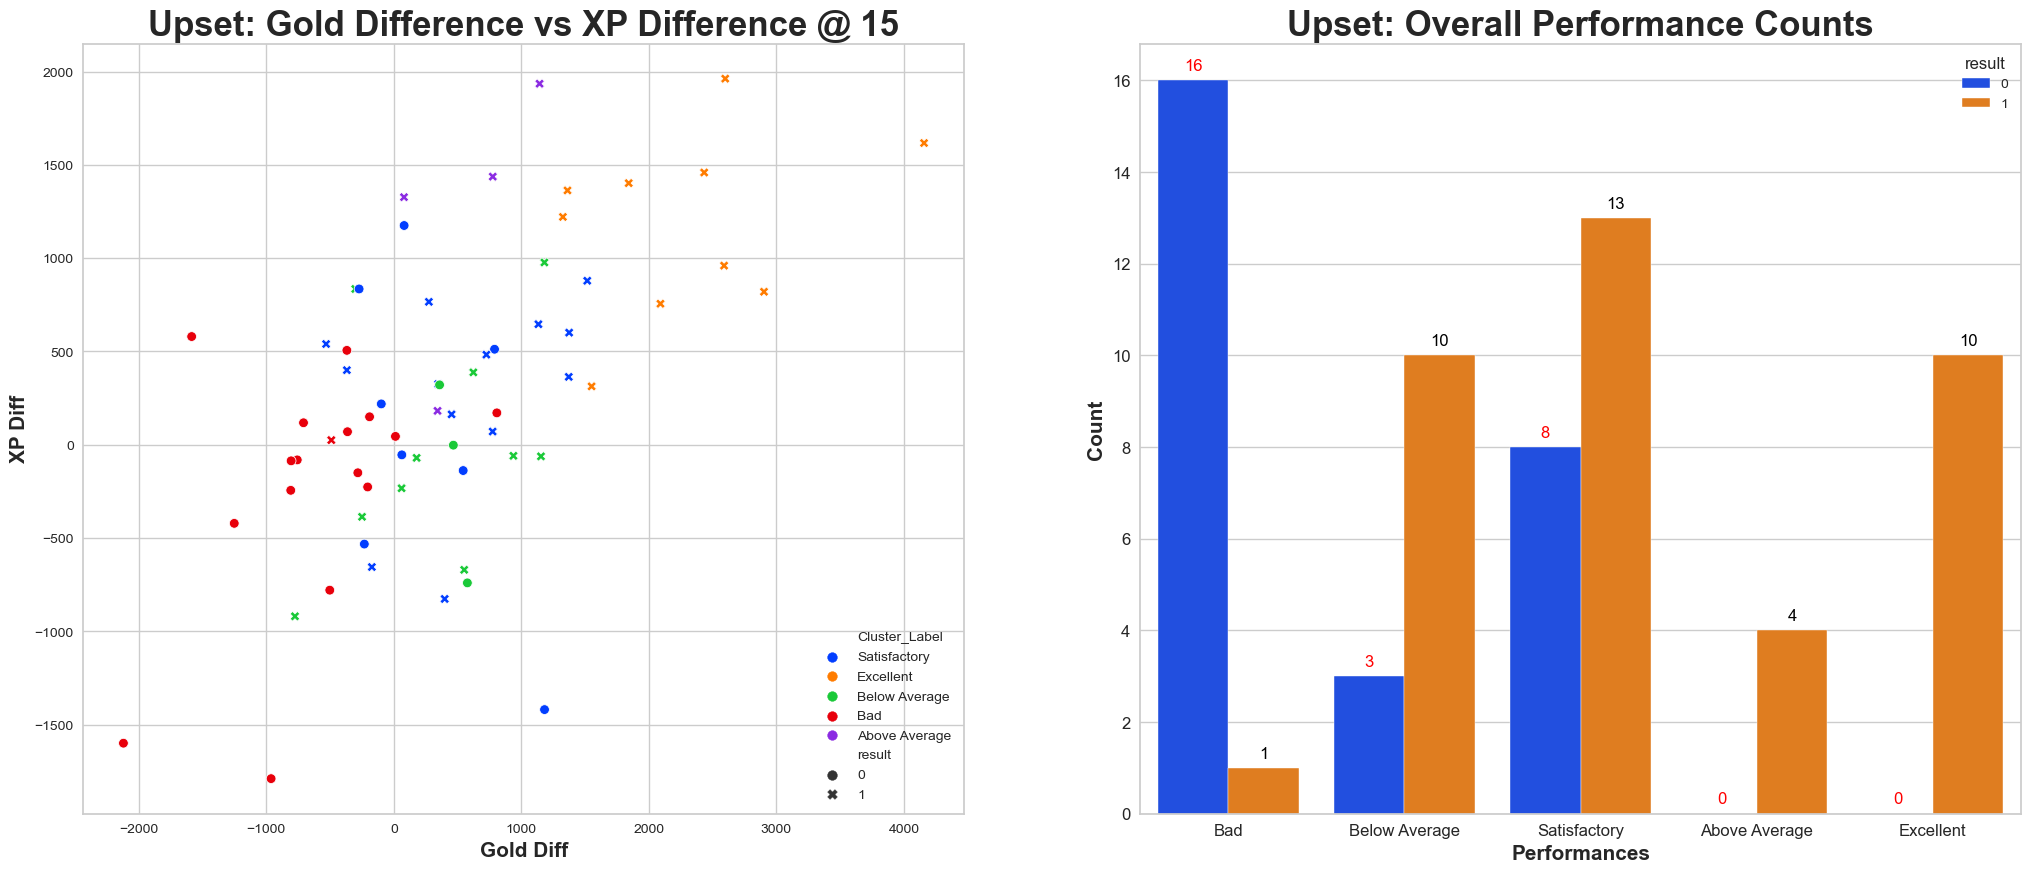

In [56]:
plt.figure(figsize=(25,10))

sns.despine()
sns.set_style("whitegrid")

#XP diff vs Gold Difference
plt.subplot(1,2,1)
sns.scatterplot(data=Upset_data_df,x="golddiffat15",y="xpdiffat15",hue="Cluster_Label",style="result",palette="bright")

plt.title("Upset: Gold Difference vs XP Difference @ 15",fontsize=25, weight="bold")
plt.xlabel("Gold Diff",fontsize=15, weight="bold")
plt.ylabel("XP Diff",fontsize=15, weight="bold")
plt.legend(loc='lower right')

#Overall Count of performances
plt.subplot(1,2,2)
ax = sns.countplot(data=Upset_data_df,x="Cluster_Label",hue="result",order=['Bad','Below Average','Satisfactory','Above Average','Excellent'],palette="bright")
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation = 0, fontsize = 12,padding =5);
ax.bar_label(ax.containers[1], label_type='edge', color = 'black',rotation = 0, fontsize = 12,padding =5);
plt.title("Upset: Overall Performance Counts",fontsize=25, weight="bold")
plt.xlabel("Performances",fontsize=15, weight="bold")
plt.ylabel("Count",fontsize=15, weight="bold")
ax.tick_params(labelsize = 12)

## Hyli

In [57]:
Hylissang_data_df = lec2022_data_df[lec2022_data_df["playername"]=="Hylissang"]
Hylissang_data_df.drop(['datacompleteness', 'league', 'year', 'firstbloodkill', 'firstbloodassist', 'firstbloodvictim','heralds', 'opp_heralds', 'firstbaron',
                     'barons','opp_barons', 'firsttower', 'towers', 'opp_towers', 'firstmidtower','firsttothreetowers', 'turretplates', 'opp_turretplates',
                     'damageshare','earnedgoldshare', 'goldspent', 'gspd', 'monsterkillsownjungle', 'monsterkillsenemyjungle'],axis=1,inplace=True)
Hylissang_data_df.head()

,split,playoffs,date,game,patch,side,position,playername,teamname,champion,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
2572,Spring,0,2022-01-14 20:10:24,1,12.01,Blue,sup,Hylissang,Fnatic,Rakan,...,0.0,644.0,588.0,10.0,1.0,0.0,0.0,0.0,2.0,0.0
2841,Spring,0,2022-01-15 19:34:12,1,12.01,Red,sup,Hylissang,Fnatic,Zilean,...,26.0,-326.0,62.0,1.0,0.0,1.0,2.0,0.0,3.0,1.0
3117,Spring,0,2022-01-16 17:58:43,1,12.01,Red,sup,Hylissang,Fnatic,Thresh,...,23.0,423.0,-4.0,2.0,0.0,3.0,1.0,0.0,2.0,1.0
5901,Spring,0,2022-01-21 17:09:26,1,12.01,Red,sup,Hylissang,Fnatic,Zilean,...,21.0,436.0,991.0,8.0,0.0,3.0,0.0,0.0,0.0,1.0
6316,Spring,0,2022-01-22 18:25:17,1,12.01,Blue,sup,Hylissang,Fnatic,Braum,...,0.0,393.0,531.0,25.0,0.0,4.0,0.0,0.0,1.0,1.0


In [58]:
Hylissang_data_df["result"] = Hylissang_data_df.result.astype("category")

Hylissang_analytical_data_df = Hylissang_data_df.drop(['split', 'playoffs', 'date', 'game', 'patch', 'side', 'position', 'playername', 'teamname', 'champion', 'gamelength', 'result', 'firstblood', 'team kpm', 'ckpm',
                                                 'inhibitors', 'opp_inhibitors','totalgold', 'earnedgold', 'earned gpm', 'total cs', 'minionkills', 'monsterkills', 'cspm','goldat10', 'csat10', 'opp_goldat10', 
                                                 'opp_csat10', 'golddiffat10', 'csdiffat10', 'goldat15',  'csat15', 'opp_goldat15', 'opp_csat15', 'golddiffat15', 'csdiffat15'],axis=1)
Hylissang_analytical_data_df.head()

for column in Hylissang_analytical_data_df.columns:
    lr,ur=remove_outlier(Hylissang_analytical_data_df[column])
    Hylissang_analytical_data_df[column]=np.where(Hylissang_analytical_data_df[column]>ur,ur,Hylissang_analytical_data_df[column])
    Hylissang_analytical_data_df[column]=np.where(Hylissang_analytical_data_df[column]<lr,lr,Hylissang_analytical_data_df[column])

scalerm = StandardScaler()
Hylissang_scaled_Data_df = pd.DataFrame(scalerm.fit_transform(Hylissang_analytical_data_df),columns=Hylissang_analytical_data_df.columns)

k_means = KMeans(n_clusters = 5,random_state=42)
k_means.fit(Hylissang_scaled_Data_df)
labels = k_means.labels_

Hylissang_data_df["Cluster_Label"] = labels

main_clust_profile = Hylissang_data_df[['wardsplaced', 'wpm', 'wardskilled', 'wcpm','controlwardsbought', 'visionscore', 'vspm', 'xpat15',  'opp_xpat15',  'xpdiffat15', 'csdiffat15' ,'killsat15', 'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15', 'opp_deathsat15','Cluster_Label']]
clust_profile = main_clust_profile.groupby("Cluster_Label").mean()
clust_profile['freq'] = Hylissang_data_df.Cluster_Label.value_counts().sort_index()

In [59]:
clust_profile.style.highlight_max(color="red")

,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,xpat15,opp_xpat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,freq
Cluster_Label,,,,,,,,,,,,,,,,,,
0,43.105263,1.404237,10.210526,0.332284,12.052632,79.263158,2.585111,4004.578947,3514.210526,490.368421,0.421053,0.526316,3.842105,0.526316,0.526316,1.315789,1.842105,19
1,57.062500,1.666569,17.437500,0.524481,14.625000,105.875000,3.118869,3770.250000,3407.125000,363.125000,3.250000,0.312500,1.312500,0.562500,0.062500,1.312500,0.687500,16
2,43.142857,1.360979,9.571429,0.308900,13.142857,74.428571,2.372664,3739.571429,3421.642857,317.928571,4.785714,0.000000,1.928571,1.857143,0.357143,3.714286,1.214286,14
3,90.571429,2.055471,20.428571,0.451557,16.857143,159.142857,3.576343,3753.428571,4747.571429,-994.142857,-31.571429,0.142857,2.285714,1.285714,0.285714,1.428571,0.714286,7
4,47.888889,1.524067,10.222222,0.318978,10.777778,84.777778,2.700500,3401.333333,4037.000000,-635.666667,5.111111,0.111111,0.555556,1.222222,0.333333,1.888889,0.111111,9


In [60]:
clust_profile.style.highlight_min(color="blue")

,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,xpat15,opp_xpat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,freq
Cluster_Label,,,,,,,,,,,,,,,,,,
0,43.105263,1.404237,10.210526,0.332284,12.052632,79.263158,2.585111,4004.578947,3514.210526,490.368421,0.421053,0.526316,3.842105,0.526316,0.526316,1.315789,1.842105,19
1,57.062500,1.666569,17.437500,0.524481,14.625000,105.875000,3.118869,3770.250000,3407.125000,363.125000,3.250000,0.312500,1.312500,0.562500,0.062500,1.312500,0.687500,16
2,43.142857,1.360979,9.571429,0.308900,13.142857,74.428571,2.372664,3739.571429,3421.642857,317.928571,4.785714,0.000000,1.928571,1.857143,0.357143,3.714286,1.214286,14
3,90.571429,2.055471,20.428571,0.451557,16.857143,159.142857,3.576343,3753.428571,4747.571429,-994.142857,-31.571429,0.142857,2.285714,1.285714,0.285714,1.428571,0.714286,7
4,47.888889,1.524067,10.222222,0.318978,10.777778,84.777778,2.700500,3401.333333,4037.000000,-635.666667,5.111111,0.111111,0.555556,1.222222,0.333333,1.888889,0.111111,9


In [61]:
mapping = {3:'Bad', 4:'Below Average', 2:'Satisfactory', 1:'Above Average', 0:'Excellent'}
Hylissang_data_df["Cluster_Label"] = [mapping[i] for i in Hylissang_data_df["Cluster_Label"]]
Hylissang_data_df.head()

,split,playoffs,date,game,patch,side,position,playername,teamname,champion,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,Cluster_Label
2572,Spring,0,2022-01-14 20:10:24,1,12.01,Blue,sup,Hylissang,Fnatic,Rakan,...,644.0,588.0,10.0,1.0,0.0,0.0,0.0,2.0,0.0,Above Average
2841,Spring,0,2022-01-15 19:34:12,1,12.01,Red,sup,Hylissang,Fnatic,Zilean,...,-326.0,62.0,1.0,0.0,1.0,2.0,0.0,3.0,1.0,Above Average
3117,Spring,0,2022-01-16 17:58:43,1,12.01,Red,sup,Hylissang,Fnatic,Thresh,...,423.0,-4.0,2.0,0.0,3.0,1.0,0.0,2.0,1.0,Above Average
5901,Spring,0,2022-01-21 17:09:26,1,12.01,Red,sup,Hylissang,Fnatic,Zilean,...,436.0,991.0,8.0,0.0,3.0,0.0,0.0,0.0,1.0,Above Average
6316,Spring,0,2022-01-22 18:25:17,1,12.01,Blue,sup,Hylissang,Fnatic,Braum,...,393.0,531.0,25.0,0.0,4.0,0.0,0.0,1.0,1.0,Excellent


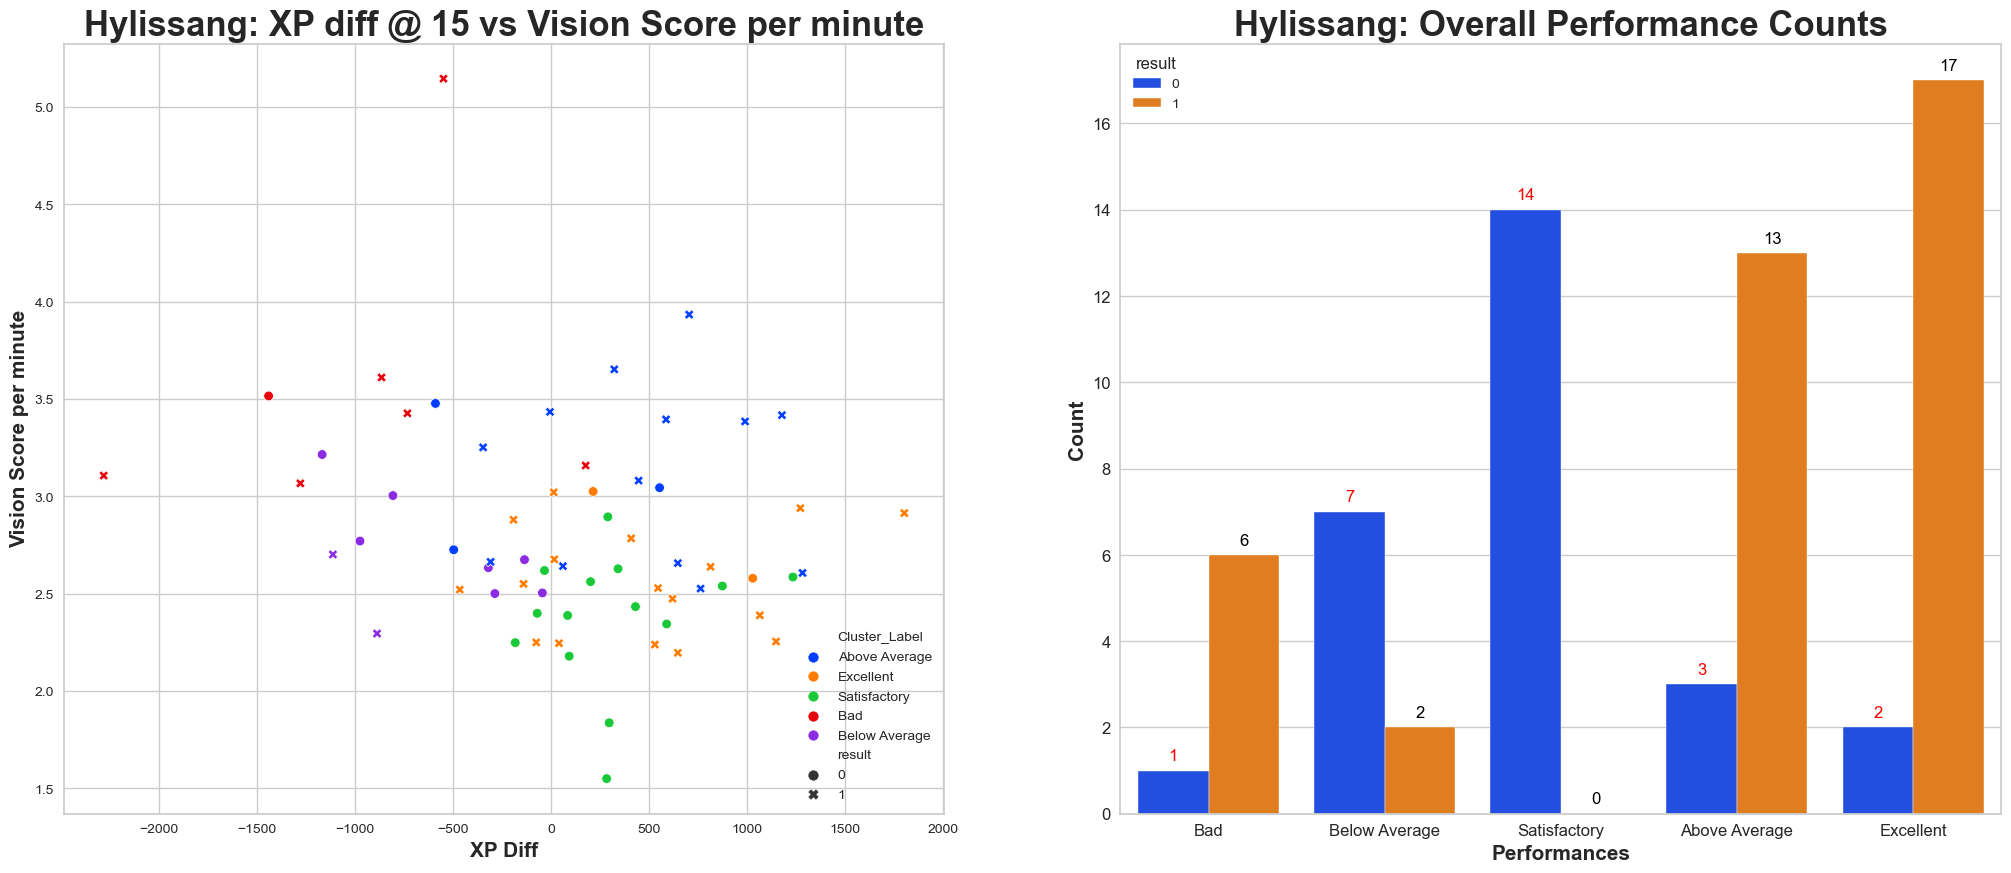

In [62]:
plt.figure(figsize=(25,10))

sns.despine()
sns.set_style("whitegrid")

#XP diff vs Gold Difference
plt.subplot(1,2,1)
sns.scatterplot(data=Hylissang_data_df,x="xpdiffat15",y="vspm",hue="Cluster_Label",style="result",palette="bright")

plt.title("Hylissang: XP diff @ 15 vs Vision Score per minute",fontsize=25, weight="bold")
plt.xlabel("XP Diff",fontsize=15, weight="bold")
plt.ylabel("Vision Score per minute",fontsize=15, weight="bold")
plt.legend(loc='lower right')

#Overall Count of performances
plt.subplot(1,2,2)
ax = sns.countplot(data=Hylissang_data_df,x="Cluster_Label",hue="result",order=['Bad','Below Average','Satisfactory','Above Average','Excellent'],palette="bright")
ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation = 0, fontsize = 12,padding =5);
ax.bar_label(ax.containers[1], label_type='edge', color = 'black',rotation = 0, fontsize = 12,padding =5);
plt.title("Hylissang: Overall Performance Counts",fontsize=25, weight="bold")
plt.xlabel("Performances",fontsize=15, weight="bold")
plt.ylabel("Count",fontsize=15, weight="bold")
ax.tick_params(labelsize = 12)

## Misc Questions

In [63]:
Required_Data_df.head(30)

,datacompleteness,league,year,split,playoffs,date,game,patch,side,position,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Blue,top,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Blue,jng,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Blue,mid,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Blue,bot,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Blue,sup,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0
5,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Red,top,...,135.0,-391.0,-345.0,-14.0,0.0,1.0,0.0,0.0,1.0,0.0
6,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Red,jng,...,89.0,-541.0,275.0,11.0,0.0,5.0,1.0,2.0,3.0,2.0
7,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Red,mid,...,120.0,475.0,-153.0,-1.0,3.0,3.0,2.0,0.0,3.0,0.0
8,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Red,bot,...,115.0,793.0,1343.0,34.0,3.0,3.0,0.0,2.0,1.0,2.0
9,complete,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,Red,sup,...,28.0,-443.0,497.0,-7.0,0.0,6.0,2.0,1.0,2.0,2.0


In [64]:
Filtered_Data_df = Required_Data_df[(Required_Data_df["league"] == "LCK") | (Required_Data_df["league"] == "LPL") | (Required_Data_df["league"] == "LEC") | (Required_Data_df["league"] == "LCS")]
Filtered_Data_df["league"].value_counts()

LPL    9432
LCK    5604
LCS    3672
LEC    2904
Name: league, dtype: int64

In [65]:
Filtered_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21612 entries, 24 to 133367
Data columns (total 95 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datacompleteness          21612 non-null  object 
 1   league                    21612 non-null  object 
 2   year                      21612 non-null  int64  
 3   split                     21264 non-null  object 
 4   playoffs                  21612 non-null  int64  
 5   date                      21612 non-null  object 
 6   game                      21612 non-null  int64  
 7   patch                     21612 non-null  float64
 8   side                      21612 non-null  object 
 9   position                  21612 non-null  object 
 10  playername                18010 non-null  object 
 11  teamname                  21612 non-null  object 
 12  champion                  18010 non-null  object 
 13  gamelength                21612 non-null  int64  
 14  resu

### Yuumi Stats

In [66]:
Supp_data_df = Filtered_Data_df[Filtered_Data_df["position"]=="sup"]

In [67]:
temp = Supp_data_df[Supp_data_df["champion"].map(Supp_data_df["champion"].value_counts())>100]
temp.head()

,datacompleteness,league,year,split,playoffs,date,game,patch,side,position,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
28,partial,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Blue,sup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,partial,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Red,sup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,partial,LPL,2022,Spring,0,2022-01-10 10:09:22,2,12.01,Blue,sup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,partial,LPL,2022,Spring,0,2022-01-10 10:09:22,2,12.01,Red,sup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,partial,LPL,2022,Spring,0,2022-01-10 11:26:11,1,12.01,Blue,sup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
orderlist = list(temp.groupby("champion")["damagetochampions"].median().sort_values(ascending=False).index)
temp.groupby("champion")["damagetochampions"].median().sort_values(ascending=False)

champion
Yuumi           7597.5
Karma           7128.0
Nami            6145.0
Tahm Kench      4998.0
Renata Glasc    4922.0
Braum           4525.0
Rakan           4025.0
Nautilus        3900.0
Lulu            3668.0
Alistar         3479.0
Leona           3135.0
Thresh          2961.0
Name: damagetochampions, dtype: float64

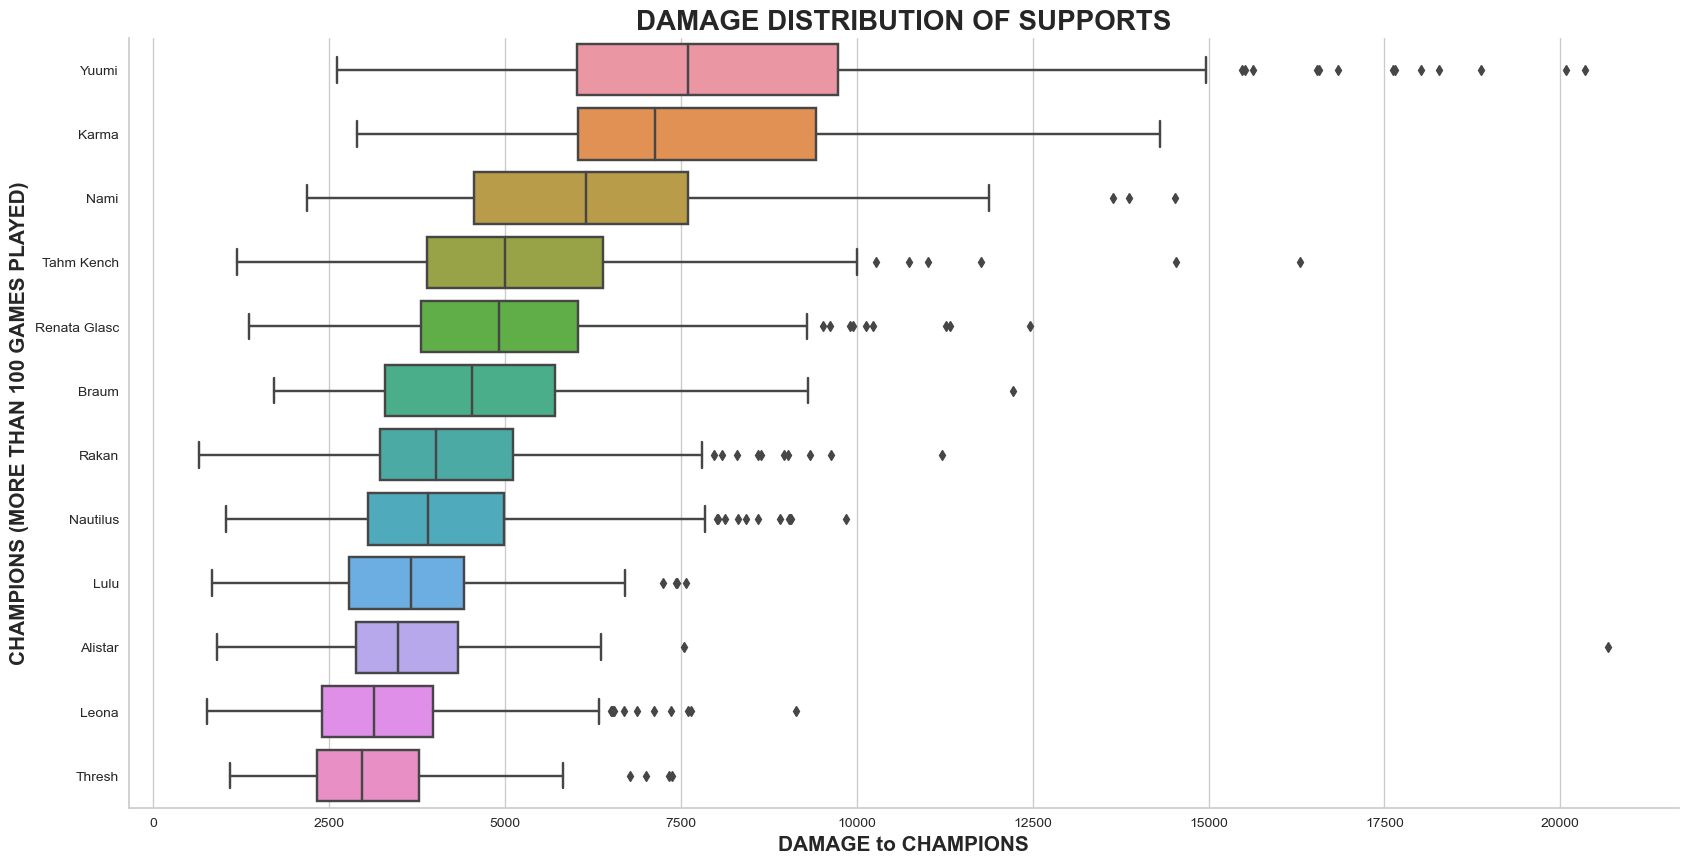

In [69]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(20,10))
plt.title("DAMAGE DISTRIBUTION OF SUPPORTS",fontsize=20, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.boxplot(data= temp, x= "damagetochampions",y="champion",order=orderlist);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xlabel("DAMAGE to CHAMPIONS",fontsize=15, weight="bold");
plt.ylabel("CHAMPIONS (MORE THAN 100 GAMES PLAYED)",fontsize=15, weight="bold");

In [70]:
orderlist2 = list(temp.groupby("champion")["damageshare"].median().sort_values(ascending=False).index)
temp.groupby("champion")["damageshare"].median().sort_values(ascending=False)

orderlist3 = list(temp.groupby("champion")["earnedgoldshare"].median().sort_values(ascending=False).index)
temp.groupby("champion")["earnedgoldshare"].median().sort_values(ascending=False)

orderlist4 = list(temp.groupby("champion")["deaths"].median().sort_values(ascending=False).index)
temp.groupby("champion")["deaths"].median().sort_values(ascending=False)

champion
Alistar         4.0
Leona           4.0
Braum           3.0
Nautilus        3.0
Tahm Kench      3.0
Thresh          3.0
Karma           2.0
Lulu            2.0
Nami            2.0
Rakan           2.0
Renata Glasc    2.0
Yuumi           1.0
Name: deaths, dtype: float64

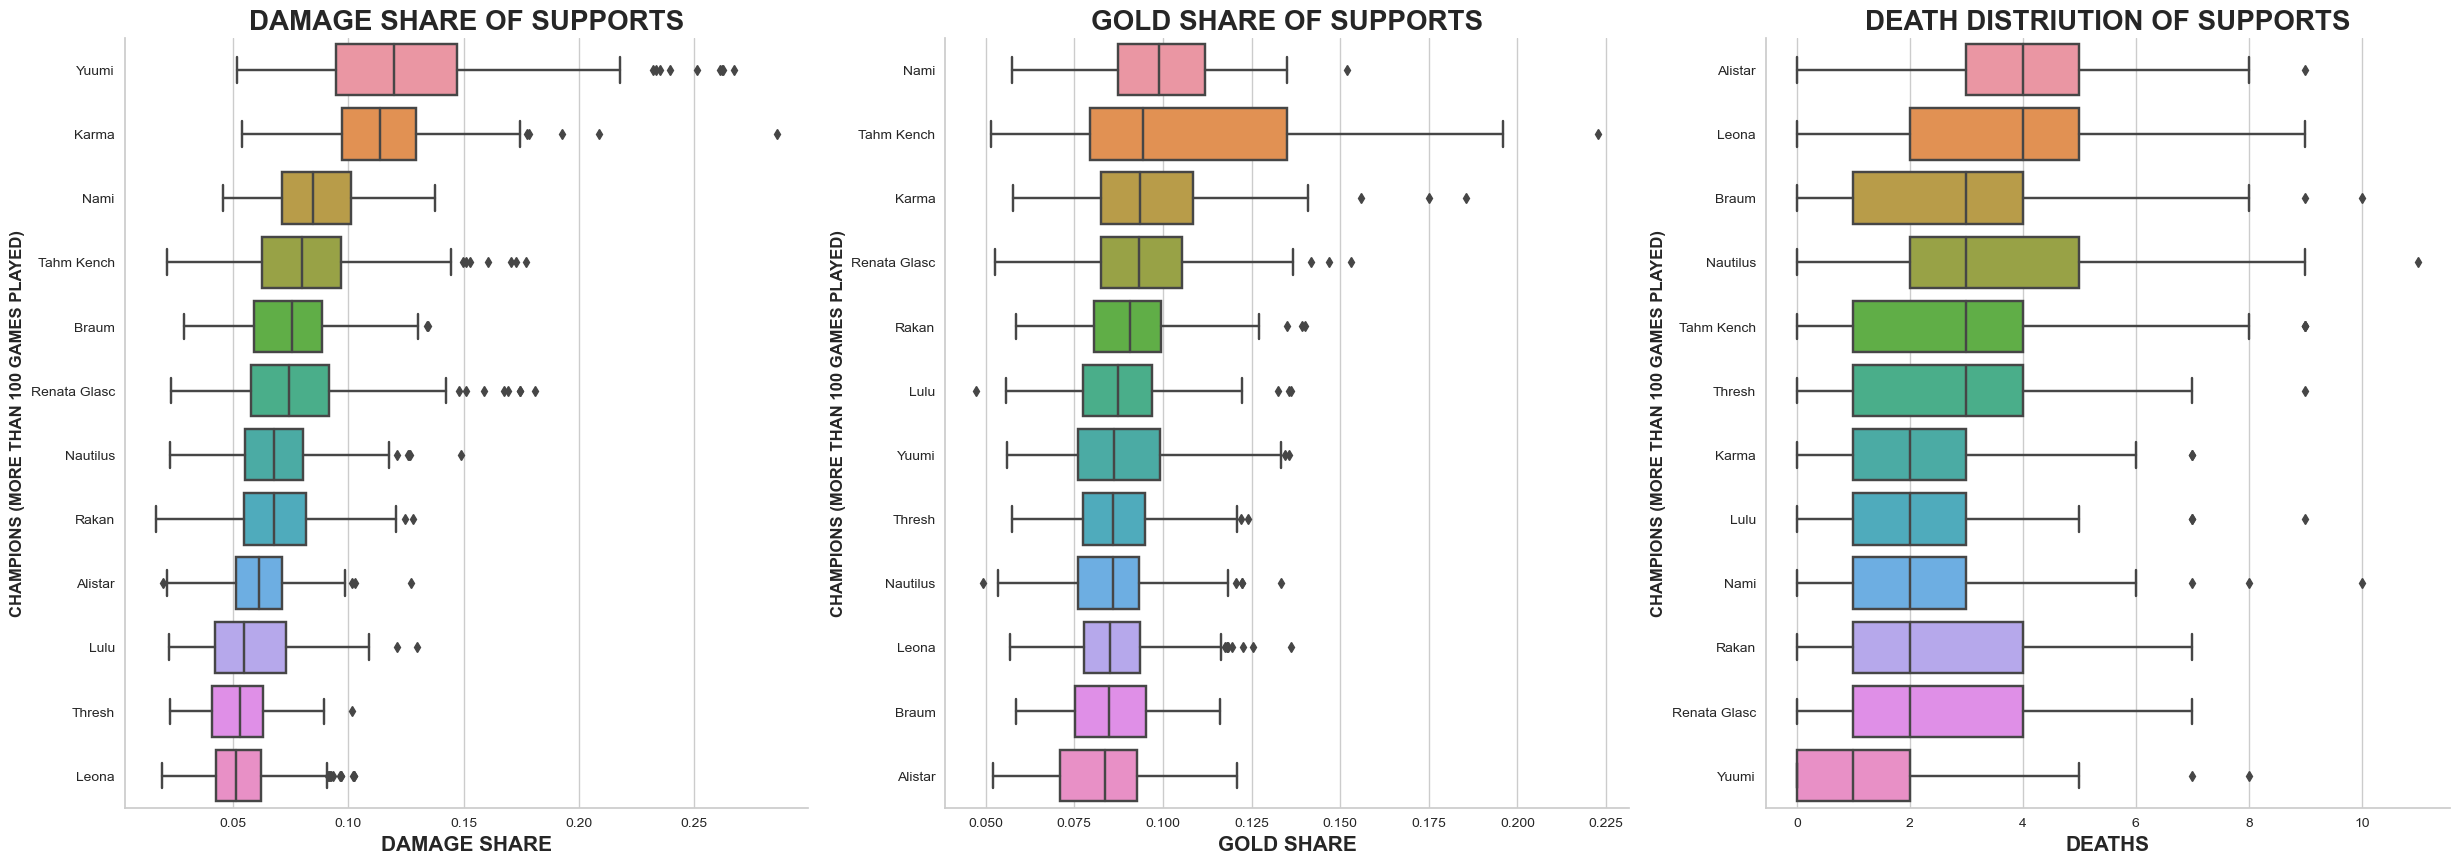

In [71]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(30,10))
plt.subplot(1,3,1)
plt.title("DAMAGE SHARE OF SUPPORTS",fontsize=20, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.boxplot(data= temp, x= "damageshare",y="champion",order=orderlist2);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xlabel("DAMAGE SHARE",fontsize=15, weight="bold");
plt.ylabel("CHAMPIONS (MORE THAN 100 GAMES PLAYED)",fontsize=12, weight="bold");


plt.subplot(1,3,2)
plt.title("GOLD SHARE OF SUPPORTS",fontsize=20, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.boxplot(data= temp, x= "earnedgoldshare",y="champion",order=orderlist3);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xlabel("GOLD SHARE",fontsize=15, weight="bold");
plt.ylabel("CHAMPIONS (MORE THAN 100 GAMES PLAYED)",fontsize=12, weight="bold");


plt.subplot(1,3,3)
plt.title("DEATH DISTRIUTION OF SUPPORTS",fontsize=20, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.boxplot(data= temp, x= "deaths",y="champion",order=orderlist4);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xlabel("DEATHS",fontsize=15, weight="bold");
plt.ylabel("CHAMPIONS (MORE THAN 100 GAMES PLAYED)",fontsize=12, weight="bold");

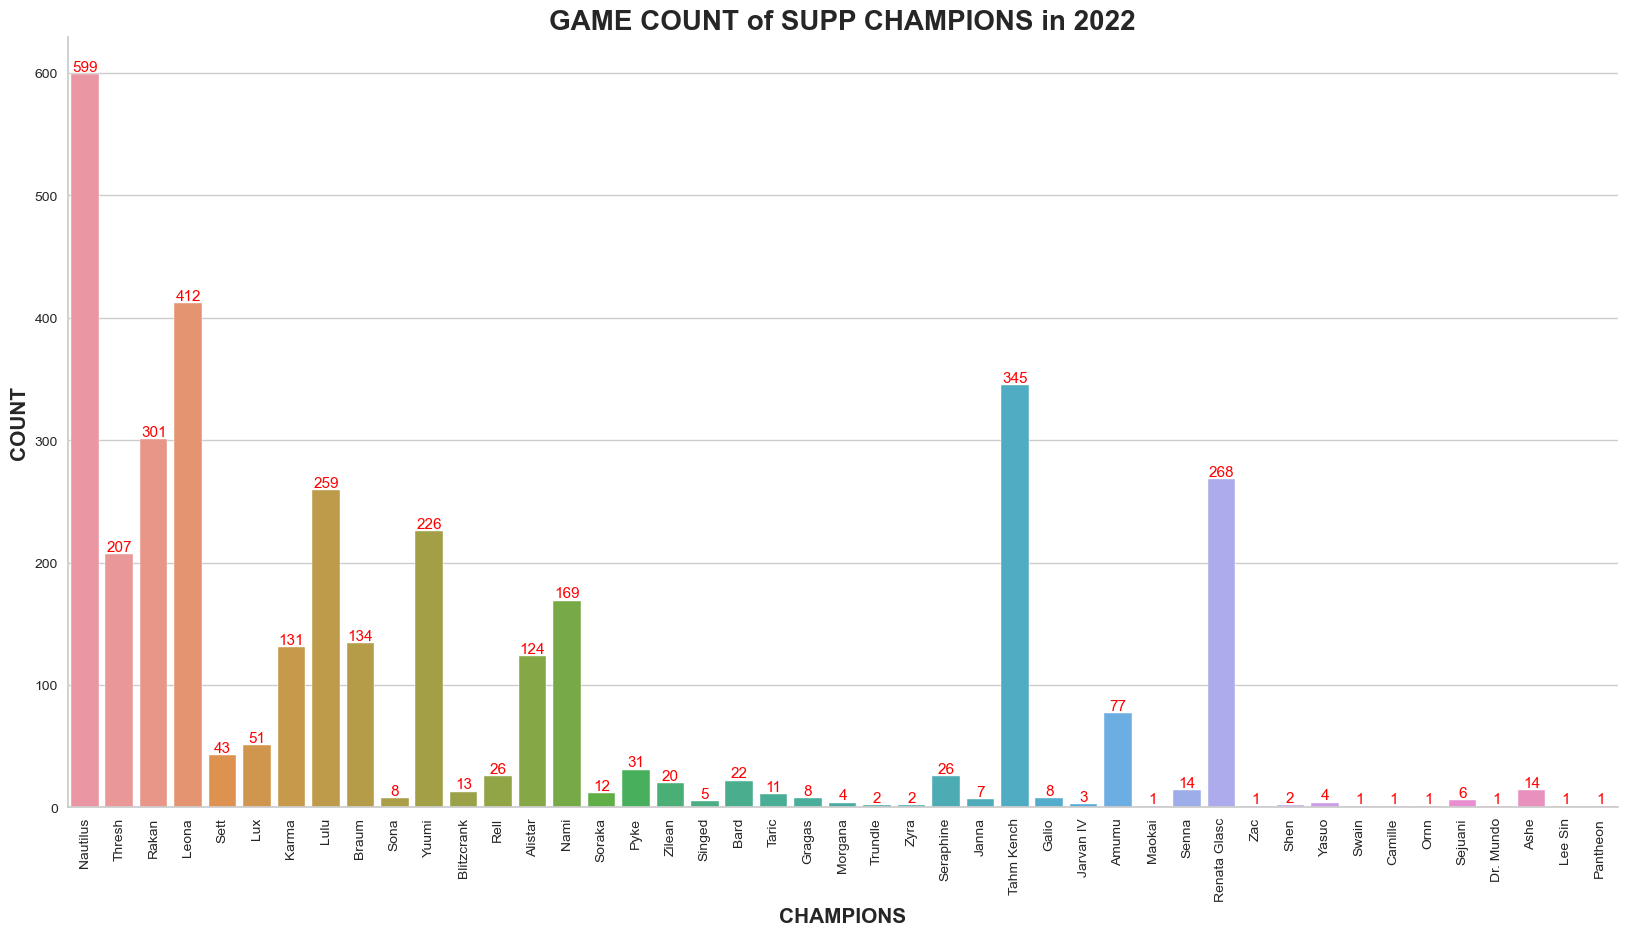

In [72]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(20,10))
plt.title("GAME COUNT of SUPP CHAMPIONS in 2022",fontsize=20, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.countplot(data= Supp_data_df, x="champion");

#Label the axes and rotate the label of the categories so that it is readable 
ax.bar_label(ax.containers[0],label_type="edge",fontsize= 11,color='red');
plt.xticks(rotation = 90)
plt.ylabel("COUNT",fontsize=15, weight="bold");
plt.xlabel("CHAMPIONS",fontsize=15, weight="bold");

## Durability Patch

In [73]:
Filtered_Data_df["Durability_patch"] = np.where(Filtered_Data_df["patch"] < 12.10, 'Before', 'After')

Filtered_Data_df.head()

,datacompleteness,league,year,split,playoffs,date,game,patch,side,position,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,Durability_patch
24,partial,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Blue,top,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Before
25,partial,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Blue,jng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Before
26,partial,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Blue,mid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Before
27,partial,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Blue,bot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Before
28,partial,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Blue,sup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Before


In [74]:
temp2 = Filtered_Data_df[Filtered_Data_df["champion"].map(Filtered_Data_df["champion"].value_counts())>100]
temp2.head()

,datacompleteness,league,year,split,playoffs,date,game,patch,side,position,...,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,Durability_patch
24,partial,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Blue,top,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Before
25,partial,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Blue,jng,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Before
27,partial,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Blue,bot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Before
28,partial,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Blue,sup,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Before
29,partial,LPL,2022,Spring,0,2022-01-10 09:24:26,1,12.01,Red,top,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Before


In [75]:
orderlist5 = list(temp2.groupby("champion")["damagemitigatedperminute"].median().sort_values(ascending=True).index)
temp2.groupby("champion")["damagemitigatedperminute"].median().sort_values(ascending=True)

champion
Yuumi            100.87790
Nami             131.14330
Lulu             149.15935
Karma            170.78340
Jhin             185.91620
Senna            187.23860
Jinx             187.91345
Xayah            203.35490
Taliyah          208.46020
Thresh           223.35925
Sivir            233.87255
Ezreal           234.79830
Twisted Fate     244.39920
Renata Glasc     255.85830
LeBlanc          262.29265
Ahri             268.98100
Orianna          269.65125
Corki            270.90360
Lucian           273.13370
Vex              297.57410
Azir             309.26380
Kennen           311.72690
Zeri             318.94580
Jayce            320.81390
Lissandra        325.94010
Kalista          333.53990
Aphelios         362.63810
Viktor           370.26040
Rakan            398.78670
Akali            415.94560
Leona            430.88170
Ryze             439.50225
Braum            441.01140
Gangplank        444.93630
Nautilus         499.35885
Sylas            535.97800
Tahm Kench       54

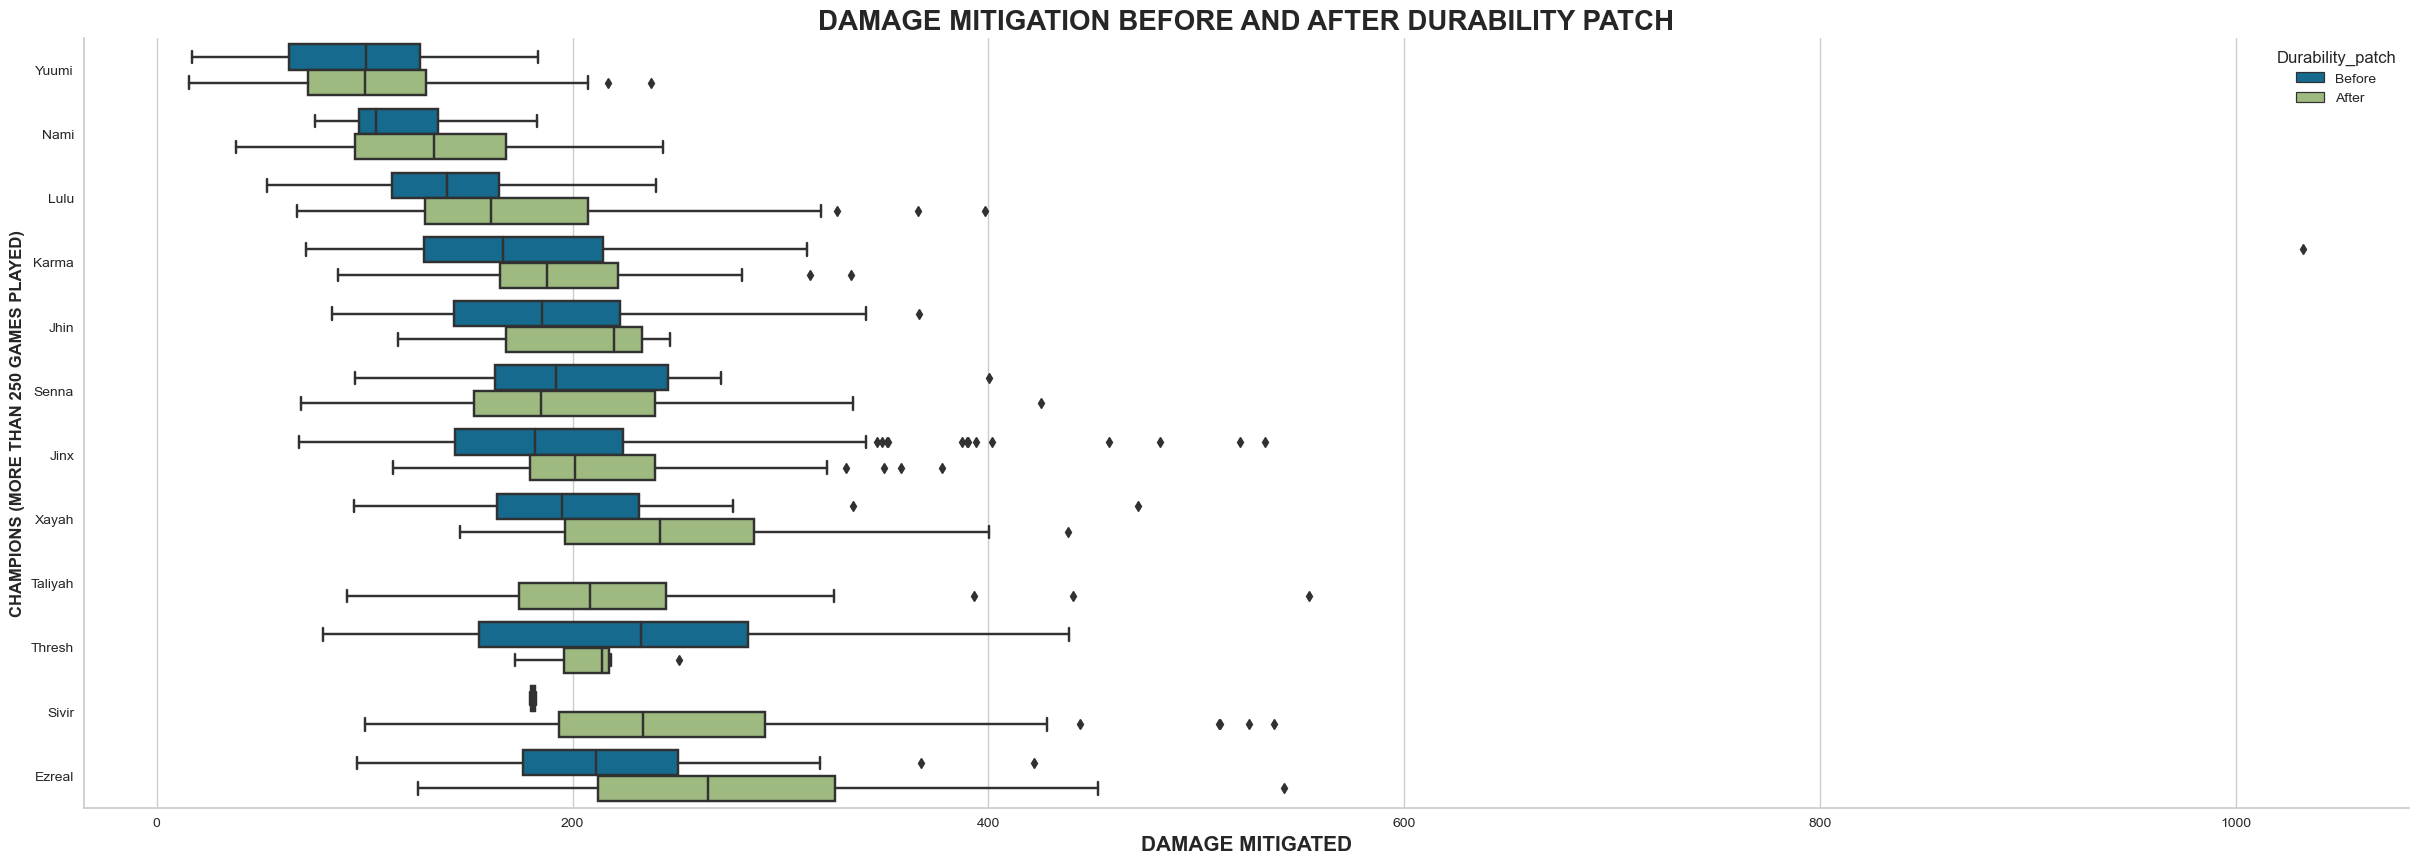

In [76]:
#Declare Figure and specify an appropriate size and title
plt.figure(figsize=(30,10))
plt.title("DAMAGE MITIGATION BEFORE AND AFTER DURABILITY PATCH",fontsize=20, weight="bold")

#Remove outer border and set grid style 
sns.despine()
sns.set_style("whitegrid")

#Plotting relevant graph using seaborn
ax = sns.boxplot(data= temp2, x= "damagemitigatedperminute",y="champion",hue="Durability_patch",order=orderlist5[:12]);

#Label the axes and rotate the label of the categories so that it is readable 
plt.xlabel("DAMAGE MITIGATED",fontsize=15, weight="bold");
plt.ylabel("CHAMPIONS (MORE THAN 250 GAMES PLAYED)",fontsize=12, weight="bold");



In [77]:
WR_df_b = temp2[temp2["Durability_patch"] == "Before"].groupby("champion")["result"].value_counts(normalize=True).to_frame()
WR_df_a = temp2[temp2["Durability_patch"] == "After"].groupby("champion")["result"].value_counts(normalize=True).to_frame()


In [78]:
WR2_b = WR_df_b.unstack(level='champion')

WR2_b.columns = WR2_b.columns.droplevel()

WR3_b= WR2_b.T

In [79]:
WR2_a = WR_df_a.unstack(level='champion')

WR2_a.columns = WR2_a.columns.droplevel()

WR3_a= WR2_a.T

In [80]:
Champ_lst = list(WR3_b.index)

In [81]:
Champ_WR_b_lst = list(WR3_b[1])
Champ_WR_a_lst = list(WR3_a[1])

In [82]:
len(Champ_lst)

59

In [83]:
Dura_df = pd.DataFrame()
Dura_df["champion"] = Champ_lst
Dura_df["Before WR"] = Champ_WR_b_lst
Dura_df["After WR"] = Champ_WR_a_lst[:len(Champ_WR_a_lst)-1]
Dura_df.head()

,champion,Before WR,After WR
0,Aatrox,0.500000,0.406977
1,Ahri,0.473684,0.525952
2,Akali,0.495798,0.493506
3,Alistar,0.457143,0.444444
4,Aphelios,0.489627,0.456140


In [84]:
Dura_df["WR_Change"] = round((Dura_df["After WR"] - Dura_df["Before WR"])*100,2)
Dura_df

,champion,Before WR,After WR,WR_Change
0,Aatrox,0.500000,0.406977,-9.30
1,Ahri,0.473684,0.525952,5.23
2,Akali,0.495798,0.493506,-0.23
3,Alistar,0.457143,0.444444,-1.27
4,Aphelios,0.489627,0.456140,-3.35
5,Azir,0.514286,0.482490,-3.18
6,Braum,0.347826,0.511364,16.35
7,Camille,0.533333,0.478261,-5.51
8,Corki,0.568421,0.476190,-9.22
9,Ezreal,0.402439,0.480000,7.76


In [85]:
WRs = Dura_df.melt(id_vars='champion').rename(columns=str.title)
WRs["Value"] = round(WRs["Value"]*100,2)
WRs

,Champion,Variable,Value
0,Aatrox,Before WR,50.00
1,Ahri,Before WR,47.37
2,Akali,Before WR,49.58
3,Alistar,Before WR,45.71
4,Aphelios,Before WR,48.96
...,...,...,...
172,Wukong,WR_Change,-87.00
173,Xayah,WR_Change,342.00
174,Xin Zhao,WR_Change,-174.00
175,Yuumi,WR_Change,977.00


In [86]:
# # Visualising the Feature Importance
# plt.figure(figsize=(15,15))
# ax = sns.barplot(y = "Champion", x='Value', hue='Variable', data = WRs);
# ax.bar_label(ax.containers[0], label_type='edge', color = 'red',rotation =0, fontsize = 10,padding =2);
# ax.bar_label(ax.containers[1], label_type='edge', color = 'black',rotation =0, fontsize = 10,padding =2);

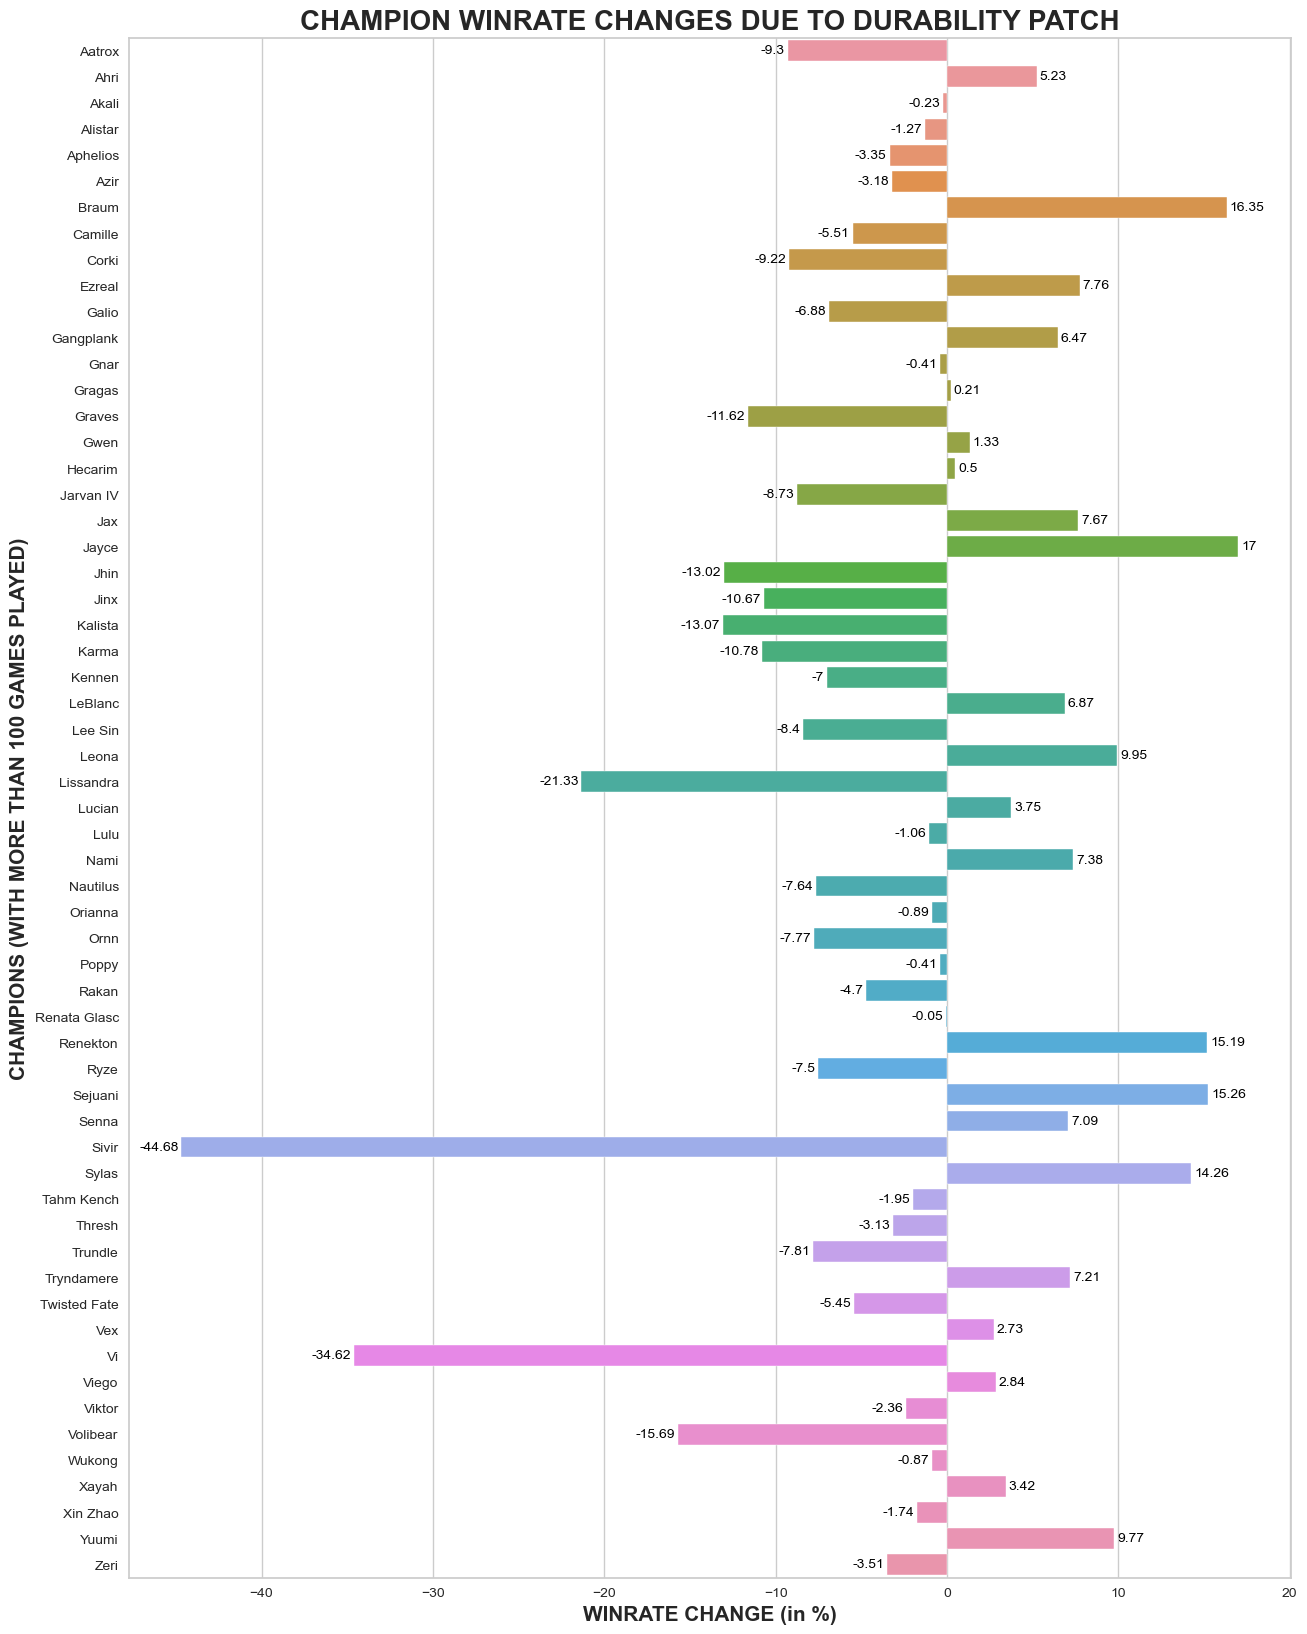

In [87]:
# Visualising the Feature Importance
plt.figure(figsize=(15,20))
ax = sns.barplot(y = "champion", x='WR_Change', data = Dura_df);
ax.bar_label(ax.containers[0], label_type='edge', color = 'black',rotation =0, fontsize = 10,padding =2);

plt.title("CHAMPION WINRATE CHANGES DUE TO DURABILITY PATCH",fontsize=20, weight="bold")
plt.xlabel("WINRATE CHANGE (in %)",fontsize=15, weight="bold");
plt.ylabel("CHAMPIONS (WITH MORE THAN 100 GAMES PLAYED)",fontsize=15, weight="bold");

In [95]:
x=Filtered_Data_df[(Filtered_Data_df["champion"]=="Alistar") & (Filtered_Data_df["damagetochampions"]>10000)]

In [97]:
x.iloc[0]

datacompleteness                       complete
league                                      LEC
year                                       2022
split                                    Spring
playoffs                                      0
date                        2022-01-15 17:13:40
game                                          1
patch                                     12.01
side                                       Blue
position                                    sup
playername                               Treatz
teamname                              SK Gaming
champion                                Alistar
gamelength                                 3293
result                                        1
kills                                         2
deaths                                        6
assists                                      19
teamkills                                    29
teamdeaths                                   24
pentakills                              